<a href="https://colab.research.google.com/github/tahiel53/proyectoDSII/blob/main/notebook_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Predicción de Riesgo de Cianobacterias en el agua

Repositorio: https://github.com/tahiel53/proyectoDSII.git

(incluye la presentación del proyecto "presentacion_proyecto_final.pdf")

Las cianobacterias son microorganismos que habitan en el agua y son esenciales en los ambientes naturales, ya que aumentan la disponibilidad de oxígeno. Sin embargo, algunas especies pueden producir compuestos tóxicos para los humanos, conocidos como cianotoxinas.
Según la OMS, en cuerpos de agua destinados a fines recreativos y para el consumo, una concentración de cianobacterias  mayor a 20000 células por mililitro puede presentar un riesgo para la salud en  debido a la producción de estas toxinas.

Ciertas condiciones como la temperatura y el exceso de nutrientes pueden producir un crecimiento de cianobacterias desmedido, conocido como "floraciones". Por esta razón, el monitoreo de las floraciones en fuentes de agua naturales y el estudio de las variables que las afectan es fundamental.

A través del análisis de datos ambientales, este proyecto busca identificar patrones y factores que contribuyan al crecimiento de cianobacterias y generar un modelo que pueda predecir el riesgo de que ocurra un florecimiento peligroso (que haya más de 20000 células por mililitro) bajo determinadas condiciones ambientales.
Esto puede ser de gran utilidad para organismos reguladores en el monitoreo y la gestión de la calidad del agua en el desarrollo de estrategias de gestión para mitigar el impacto en la salud pública y la calidad del agua.

## Preguntas

### Preguntas principales:
¿Cómo influye la disponibilidad de nutrientes en los florecimientos de cianobacterias?

¿Tiene la temperatura un impacto significativo en el crecimiento de las cianobacterias?
### Preguntas secundarias:
¿Cual fue la tendencia de aparición de floraciones?

¿Existen diferencias en la concentración de cianobacterias entre distintos cuerpos de agua y tipos de ambiente?

¿Qué nutrientes tienen mayor impacto en la aparición de florecimientos?

¿Es más relevante la temperatura bajo el agua que en la superficie para el crecimiento de cianobacterias?

## Datos disponibles

Se dispone de un dataset con 640 muestreos en distintos embalses en Estados Unidos. Las mediciones realizadas incluyen la concentración de cianobacterias (variable de interes) y condiciones del ambiente como nutrientes del agua, temperatura y precipitaciones en los meses de verano.

### Variables:

* Reservoir: Iniciales del nombre del embalse
* Reservoir_type: Tipo de ambiente según la vegetación
  * 1 = boscoso con estratificación
  * 2 = agrícola con estratificación
  * 3 = estratificación debil o no estratificado
* Year: Año del muestreo
* Cyanobacteria_Max_cells/ml: concentración de cianobacterias (células/ml)
* TP_ppb = Fósforo total (ppm)
* P_dissolved_ppb = Fosforo disuleto (ppb)
* TKN_ppm = Nitrógeno total de Kjeldahl (ppm)
* NH3_ppm = Amoníaco total (ppm)
* NOx_ppm = Nitritos y nitratos totales (ppm)
* TOC_ppm = Carbono orgánico total (ppm)
* Alcalinity_ppm = Alcalinidad (ppm)
* Summer_precip_inches = Precipitaciones totales durante el verano
* ST_Celsius = Temperatura (ºC) en la superficie (para Mayo, Junio, Julio y Agosto)
* DT_Celsius = Temperatura (ºC) en la profundidad (para Mayo, Junio, Julio y Agosto)
* DO_mg/l = Oxígeno disuelto en la profundidad (mg/l)

Además de las mediciones en los embalses, se tiene un promedio de mediciones de los afluentes que desembocan en cada embalse ("6to8inflow"). Estas variables representan un promedio entre los meses de Junio a Agosto:
* NH36to8inflow_ppm = Amoníaco total (ppm)
* TKN6to8inflow_ppm = Nitrógeno total de Kjeldahl (ppm)
* NOx6to8inflow_ppm = Nitritos y nitratos totales (ppm)
* TP6to8inflow_ppb = Fósforo total (ppm)
* TOC6to8inflow_ppm = Carbono orgánico total (ppm)

# Importación de los datos
Los datos fueron cargados en un repositorio de github para acceder fácilmente desde Google Collab

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, learning_curve
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px

In [49]:
# Cargar el archivo Excel
file_path = 'https://github.com/tahiel53/proyectoDSII/raw/refs/heads/main/CyanoMaxCD_environmental_vars_FINAL.xlsx'

In [50]:
# Leer la segunda hoja del archivo (índice 1)
data = pd.read_excel(file_path, sheet_name=1)

In [51]:
data.head()

,Reservoir,Reservoir_type,Year,Cyanobacteria_Max_cells/ml,logCyanoMax_cells/ml,Chlorophyll_a_ug/l,Secchi_cm,TP_ppb,P_dissolved_ppb,TKN_ppm,...,mayST_Celsius,junST_Celsius,julST_Celsius,augST_Celsius,mayDO_mg/l,junDO_mg/l,mayDT_Celsius,junDT_Celsius,julDT_Celsius,augDT_Celsius
0,BHR,1,1987,na,na,na,162,5,5,0.125,...,na,na,na,na,na,na,na,na,na,na
1,BHR,1,1988,235.616384,2.372205,na,na,5,32.5,0.05,...,na,na,na,na,na,na,na,na,na,na
2,BHR,1,1989,na,na,na,na,12,7.5,0.2,...,18.56945,24.6643,27.1132,26.83358,8.488579,6.277267,12.946836,17.037883,20.765282,22.331586
3,BHR,1,1990,na,na,2,116,115,115,0.075,...,20.34055,24.5,27.8436,26.9803,7.503207,4.352679,14.655307,17.616071,20.855864,21.938536
4,BHR,1,1991,na,na,na,103,35.5,10,0.133333,...,23.826517,26.6232,28.385333,27.56425,na,3.833392,16.090436,21.098133,23.554757,25.351131


In [52]:
# No se detectan los valores nulos porque estan escritos como "na"
print(data.isnull().sum())

Reservoir                     0
Reservoir_type                0
Year                          0
Cyanobacteria_Max_cells/ml    0
logCyanoMax_cells/ml          0
Chlorophyll_a_ug/l            0
Secchi_cm                     0
TP_ppb                        0
P_dissolved_ppb               0
TKN_ppm                       0
NH3_ppm                       0
NOx_ppm                       0
TOC_ppm                       0
Alkalinity_ppm                0
NH36to8inflow_ppm             0
TKN6to8inflow_ppm             0
NOx6to8inflow_ppm             0
TP6to8inflow_ppb              0
TOC6to8inflow_ppm             0
Summer_precip_inches          0
Summer_precip_Z-score         0
mayST_Celsius                 0
junST_Celsius                 0
julST_Celsius                 0
augST_Celsius                 0
mayDO_mg/l                    0
junDO_mg/l                    0
mayDT_Celsius                 0
junDT_Celsius                 0
julDT_Celsius                 0
augDT_Celsius                 0
dtype: i

In [53]:
# Guardar como CSV
data.to_csv('datos.csv', index=False)

In [54]:
# Creo dataframe reconociendo valores 'na' como nulos
df = pd.read_csv('datos.csv', na_values=['na'])

In [55]:
df.head()

,Reservoir,Reservoir_type,Year,Cyanobacteria_Max_cells/ml,logCyanoMax_cells/ml,Chlorophyll_a_ug/l,Secchi_cm,TP_ppb,P_dissolved_ppb,TKN_ppm,...,mayST_Celsius,junST_Celsius,julST_Celsius,augST_Celsius,mayDO_mg/l,junDO_mg/l,mayDT_Celsius,junDT_Celsius,julDT_Celsius,augDT_Celsius
0,BHR,1,1987,NaN,NaN,NaN,162.0,5.0,5.0,0.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BHR,1,1988,235.616384,2.372205,NaN,NaN,5.0,32.5,0.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BHR,1,1989,NaN,NaN,NaN,NaN,12.0,7.5,0.200000,...,18.569450,24.6643,27.113200,26.83358,8.488579,6.277267,12.946836,17.03788333333333,20.765282,22.331586
3,BHR,1,1990,NaN,NaN,2.0,116.0,115.0,115.0,0.075000,...,20.340550,24.5000,27.843600,26.98030,7.503207,4.352679,14.655307,17.616071428571427,20.855864,21.938536
4,BHR,1,1991,NaN,NaN,NaN,103.0,35.5,10.0,0.133333,...,23.826517,26.6232,28.385333,27.56425,NaN,3.833392,16.090436,21.098133333333333,23.554757,25.351131


In [56]:
# Revisar valores nulos
print(df.isnull().sum())

Reservoir                       0
Reservoir_type                  0
Year                            0
Cyanobacteria_Max_cells/ml    216
logCyanoMax_cells/ml          216
Chlorophyll_a_ug/l            373
Secchi_cm                      74
TP_ppb                        334
P_dissolved_ppb               489
TKN_ppm                       341
NH3_ppm                       330
NOx_ppm                       329
TOC_ppm                       218
Alkalinity_ppm                262
NH36to8inflow_ppm             387
TKN6to8inflow_ppm             398
NOx6to8inflow_ppm             336
TP6to8inflow_ppb              382
TOC6to8inflow_ppm             280
Summer_precip_inches            0
Summer_precip_Z-score           0
mayST_Celsius                 145
junST_Celsius                 135
julST_Celsius                 121
augST_Celsius                 108
mayDO_mg/l                    195
junDO_mg/l                    188
mayDT_Celsius                 191
junDT_Celsius                 182
julDT_Celsius 

In [57]:
# Reviso el tipo de datos presentes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   640 non-null    object 
 1   Reservoir_type              640 non-null    int64  
 2   Year                        640 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  424 non-null    float64
 4   logCyanoMax_cells/ml        424 non-null    float64
 5   Chlorophyll_a_ug/l          267 non-null    float64
 6   Secchi_cm                   566 non-null    float64
 7   TP_ppb                      306 non-null    float64
 8   P_dissolved_ppb             151 non-null    float64
 9   TKN_ppm                     299 non-null    float64
 10  NH3_ppm                     310 non-null    float64
 11  NOx_ppm                     311 non-null    float64
 12  TOC_ppm                     422 non-null    float64
 13  Alkalinity_ppm              378 non

In [58]:
# La columna 'junDT_Celsius' aparece como 'object' cuando deberia tener solo
# valores numéricos. Elimino los valores no numéricos:
df['junDT_Celsius'] = pd.to_numeric(df['junDT_Celsius'], errors='coerce')

In [59]:
# Verifico
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   640 non-null    object 
 1   Reservoir_type              640 non-null    int64  
 2   Year                        640 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  424 non-null    float64
 4   logCyanoMax_cells/ml        424 non-null    float64
 5   Chlorophyll_a_ug/l          267 non-null    float64
 6   Secchi_cm                   566 non-null    float64
 7   TP_ppb                      306 non-null    float64
 8   P_dissolved_ppb             151 non-null    float64
 9   TKN_ppm                     299 non-null    float64
 10  NH3_ppm                     310 non-null    float64
 11  NOx_ppm                     311 non-null    float64
 12  TOC_ppm                     422 non-null    float64
 13  Alkalinity_ppm              378 non

# Tratamiento de nulos

In [60]:
# Eliminar filas donde la variable dependiente 'Cyanobacteria_Max_cells/ml'
# tiene valores nulos

df = df.dropna(subset=['Cyanobacteria_Max_cells/ml'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 1 to 639
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   424 non-null    object 
 1   Reservoir_type              424 non-null    int64  
 2   Year                        424 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  424 non-null    float64
 4   logCyanoMax_cells/ml        424 non-null    float64
 5   Chlorophyll_a_ug/l          167 non-null    float64
 6   Secchi_cm                   401 non-null    float64
 7   TP_ppb                      210 non-null    float64
 8   P_dissolved_ppb             83 non-null     float64
 9   TKN_ppm                     210 non-null    float64
 10  NH3_ppm                     210 non-null    float64
 11  NOx_ppm                     210 non-null    float64
 12  TOC_ppm                     268 non-null    float64
 13  Alkalinity_ppm              260 non-null

### Embalses
Observo si hay algun embalse con muchos nulos para quitarlo

In [61]:
nulos_por_embalse = df.groupby('Reservoir').apply(lambda x: x.isna().sum())

print(nulos_por_embalse)

           Reservoir  Reservoir_type  Year  Cyanobacteria_Max_cells/ml  \
Reservoir                                                                
BHR                0               0     0                           0   
BRR                0               0     0                           0   
BVR                0               0     0                           0   
CBR                0               0     0                           0   
CCK                0               0     0                           0   
CFK                0               0     0                           0   
CHL                0               0     0                           0   
CMR                0               0     0                           0   
CRR                0               0     0                           0   
EFR                0               0     0                           0   
GRR                0               0     0                           0   
HTR                0               0  

<ipython-input-61-146a527285ee>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulos_por_embalse = df.groupby('Reservoir').apply(lambda x: x.isna().sum())


Los embalses WFR y HTR no tienen información de la temperatura y oxigeno disuelto bajo el agua por lo tanto los saco de la tabla

In [62]:
# Elimino embalses con muchos nulos
df = df[df['Reservoir'].isin(['WFR', 'HTR']) == False]

### Temperaturas

Primero hago un promedio de la temperatura en la superficie y profundidad del agua entre los cuatro meses medidos

In [63]:
# Crear la columna con el promedio de las temperaturas de mayo,
# junio, julio y agosto (en superficie)
df['meanST_Celsius'] = df[['mayST_Celsius', 'junST_Celsius', 'julST_Celsius', 'augST_Celsius']].mean(axis=1)

<ipython-input-63-f0040c25c639>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meanST_Celsius'] = df[['mayST_Celsius', 'junST_Celsius', 'julST_Celsius', 'augST_Celsius']].mean(axis=1)


In [64]:
# Mostrar las primeras filas para verificar
print(df[['mayST_Celsius', 'junST_Celsius', 'julST_Celsius', 'augST_Celsius', 'meanST_Celsius']].head())


    mayST_Celsius  junST_Celsius  julST_Celsius  augST_Celsius  meanST_Celsius
1             NaN            NaN            NaN            NaN             NaN
5       20.267183       23.26970      27.764800       26.21610       24.379446
6       21.356100       25.41624      30.903000       28.01782       26.423290
8       19.067525       25.46340      28.596300       29.42930       25.639131
11      20.747250       27.01420      28.603867       28.19990       26.141304


In [65]:
# Crear la columna con el promedio de las temperaturas de mayo,
# junio, julio y agosto (en profundidad)
df['meanDT_Celsius'] = df[['mayDT_Celsius', 'junDT_Celsius', 'julDT_Celsius', 'augDT_Celsius']].mean(axis=1)

In [66]:
# Mostrar las primeras filas para verificar
print(df[['mayDT_Celsius', 'junDT_Celsius', 'julDT_Celsius', 'augDT_Celsius', 'meanDT_Celsius']].head())

    mayDT_Celsius  junDT_Celsius  julDT_Celsius  augDT_Celsius  meanDT_Celsius
1             NaN            NaN            NaN            NaN             NaN
5       14.581436      18.194818      21.432611      22.660048       19.217228
6       14.104900      18.550539      21.603696      22.439200       19.174584
8       13.734060      16.845725      19.898879      21.808714       18.071845
11      14.200250      18.991906      21.776550      22.749556       19.429565


Para rellenar los valores nulos de las temperaturas voy a tener en cuenta las temperaturas de cada embalse por separado, ya que varia dependiendo de la ubicación geográfica

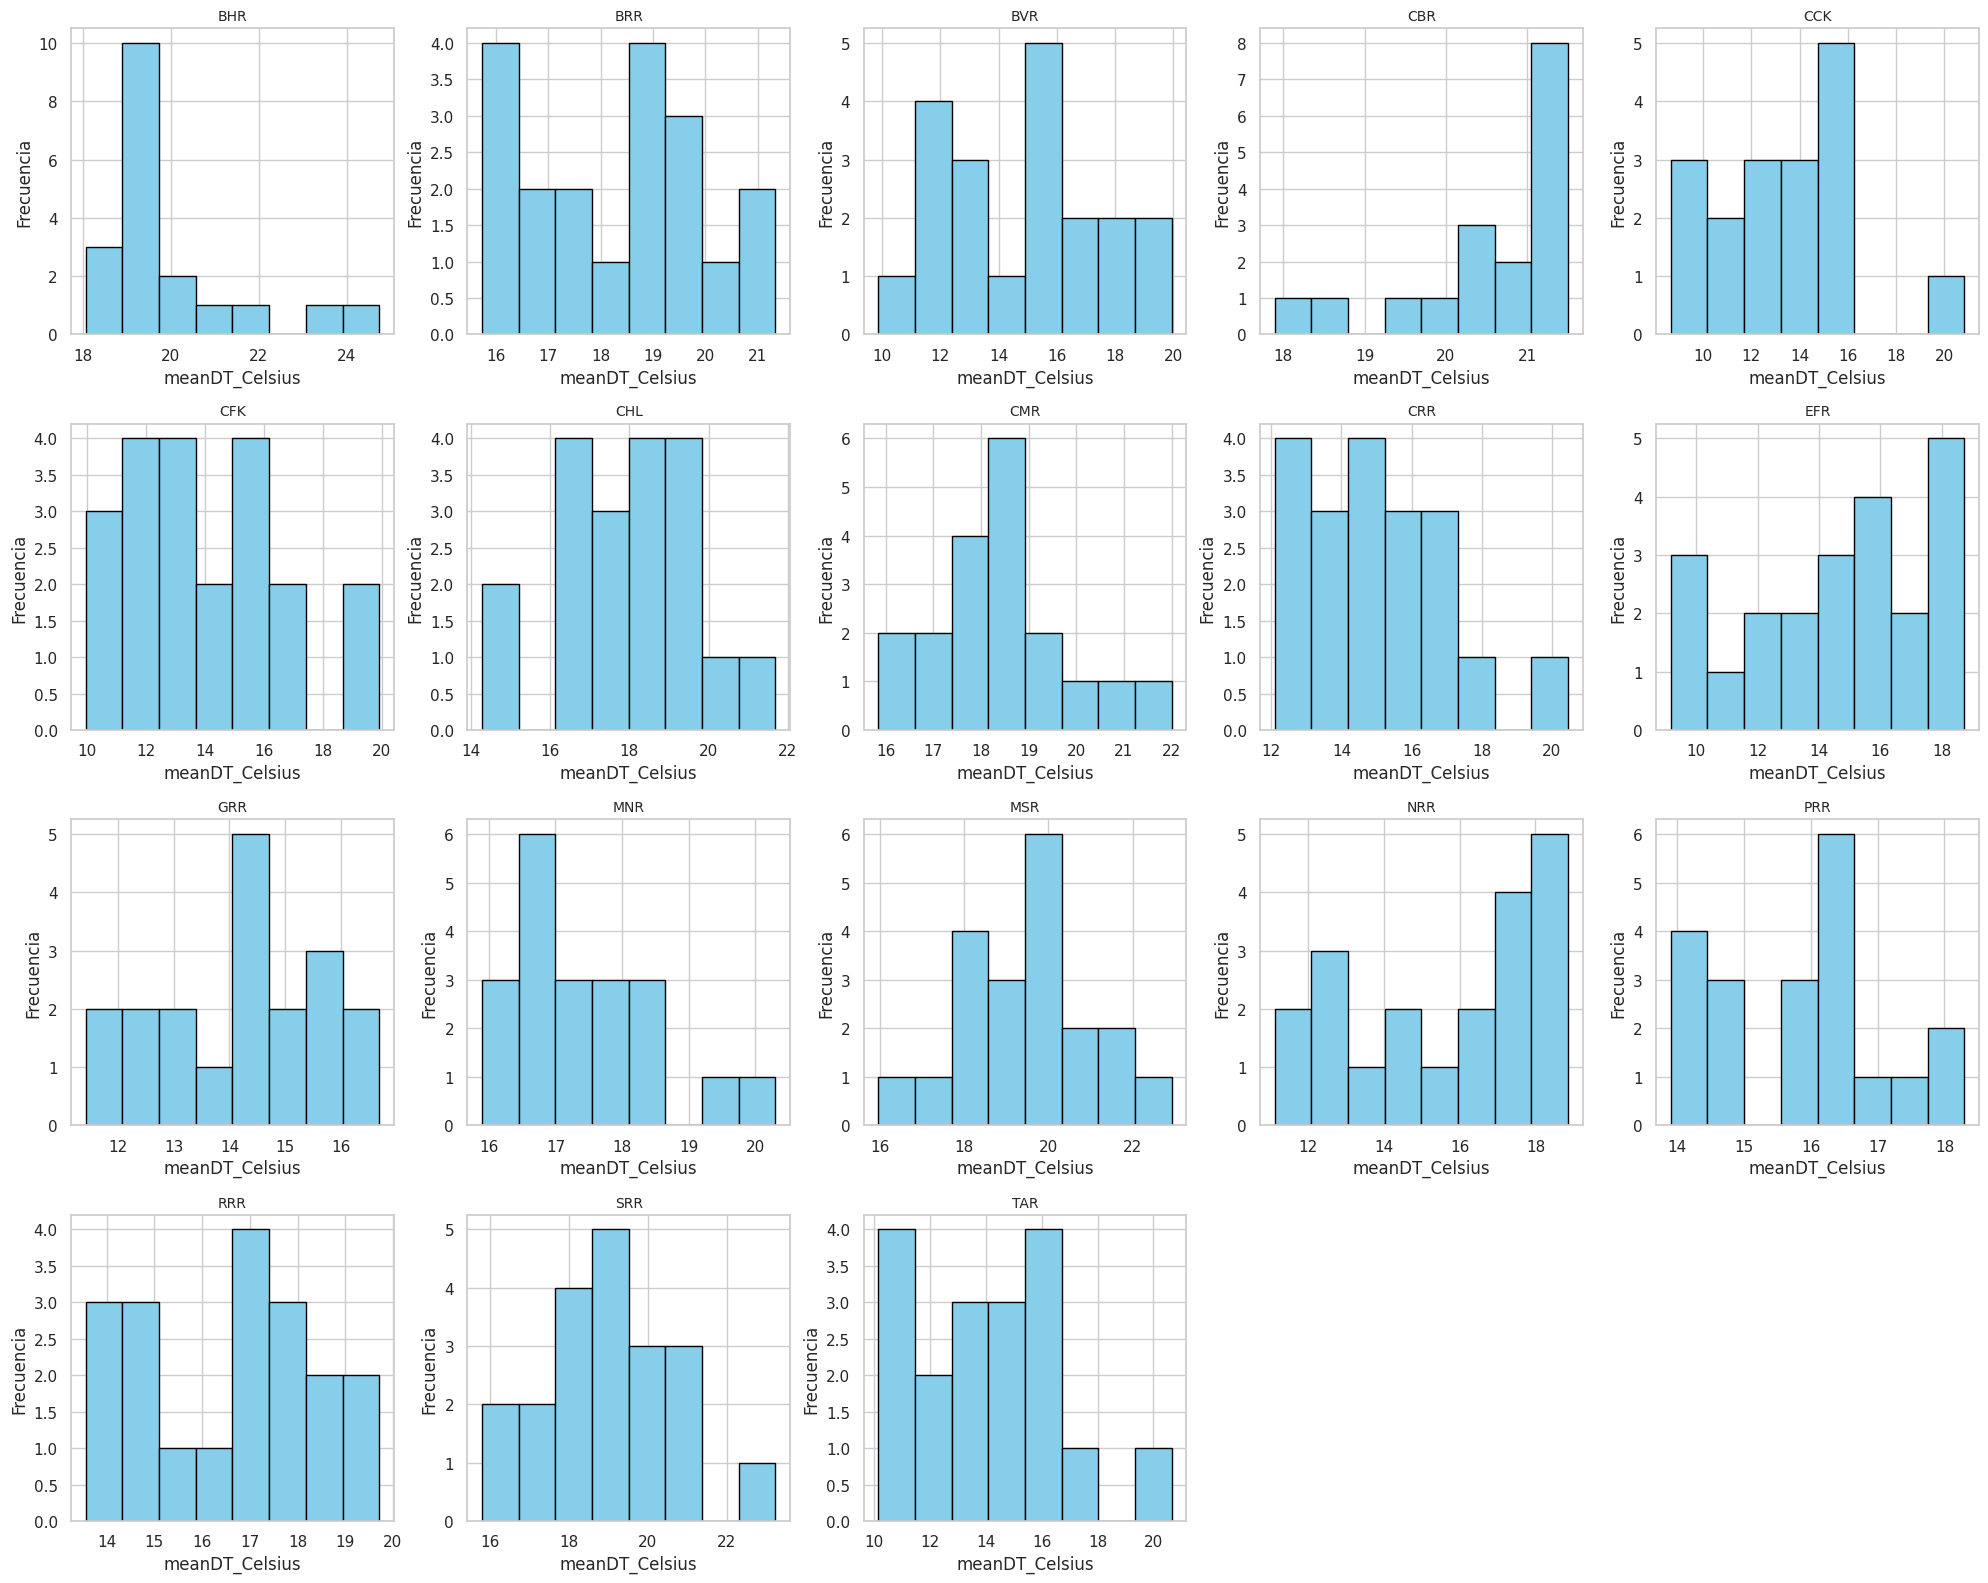

In [67]:
# Me fijo la distribución de la temperatura 'en profundidad' en cada embalse
# para determinar si completo con la media o la mediana

# Filtrar filas sin datos nulos en la columna 'meanDT_Celsius'
df_filtrado = df[['Reservoir', 'meanDT_Celsius']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['meanDT_Celsius']
    ax.hist(datos, bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('meanDT_Celsius')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()


La temperatura en profundidad no tiene una distribución simétrica en muchos casos. Me parece conveniente rellenar los valores nulos con la mediana de cada embalse en este caso

In [68]:
# Calcular la mediana de 'meanDT_Celsius' por embalse
medianas_embalse = df.groupby('Reservoir')['meanDT_Celsius'].transform('median')

# Rellenar los valores nulos con la mediana correspondiente de cada embalse
df['meanDT_Celsius'] = df['meanDT_Celsius'].fillna(medianas_embalse)

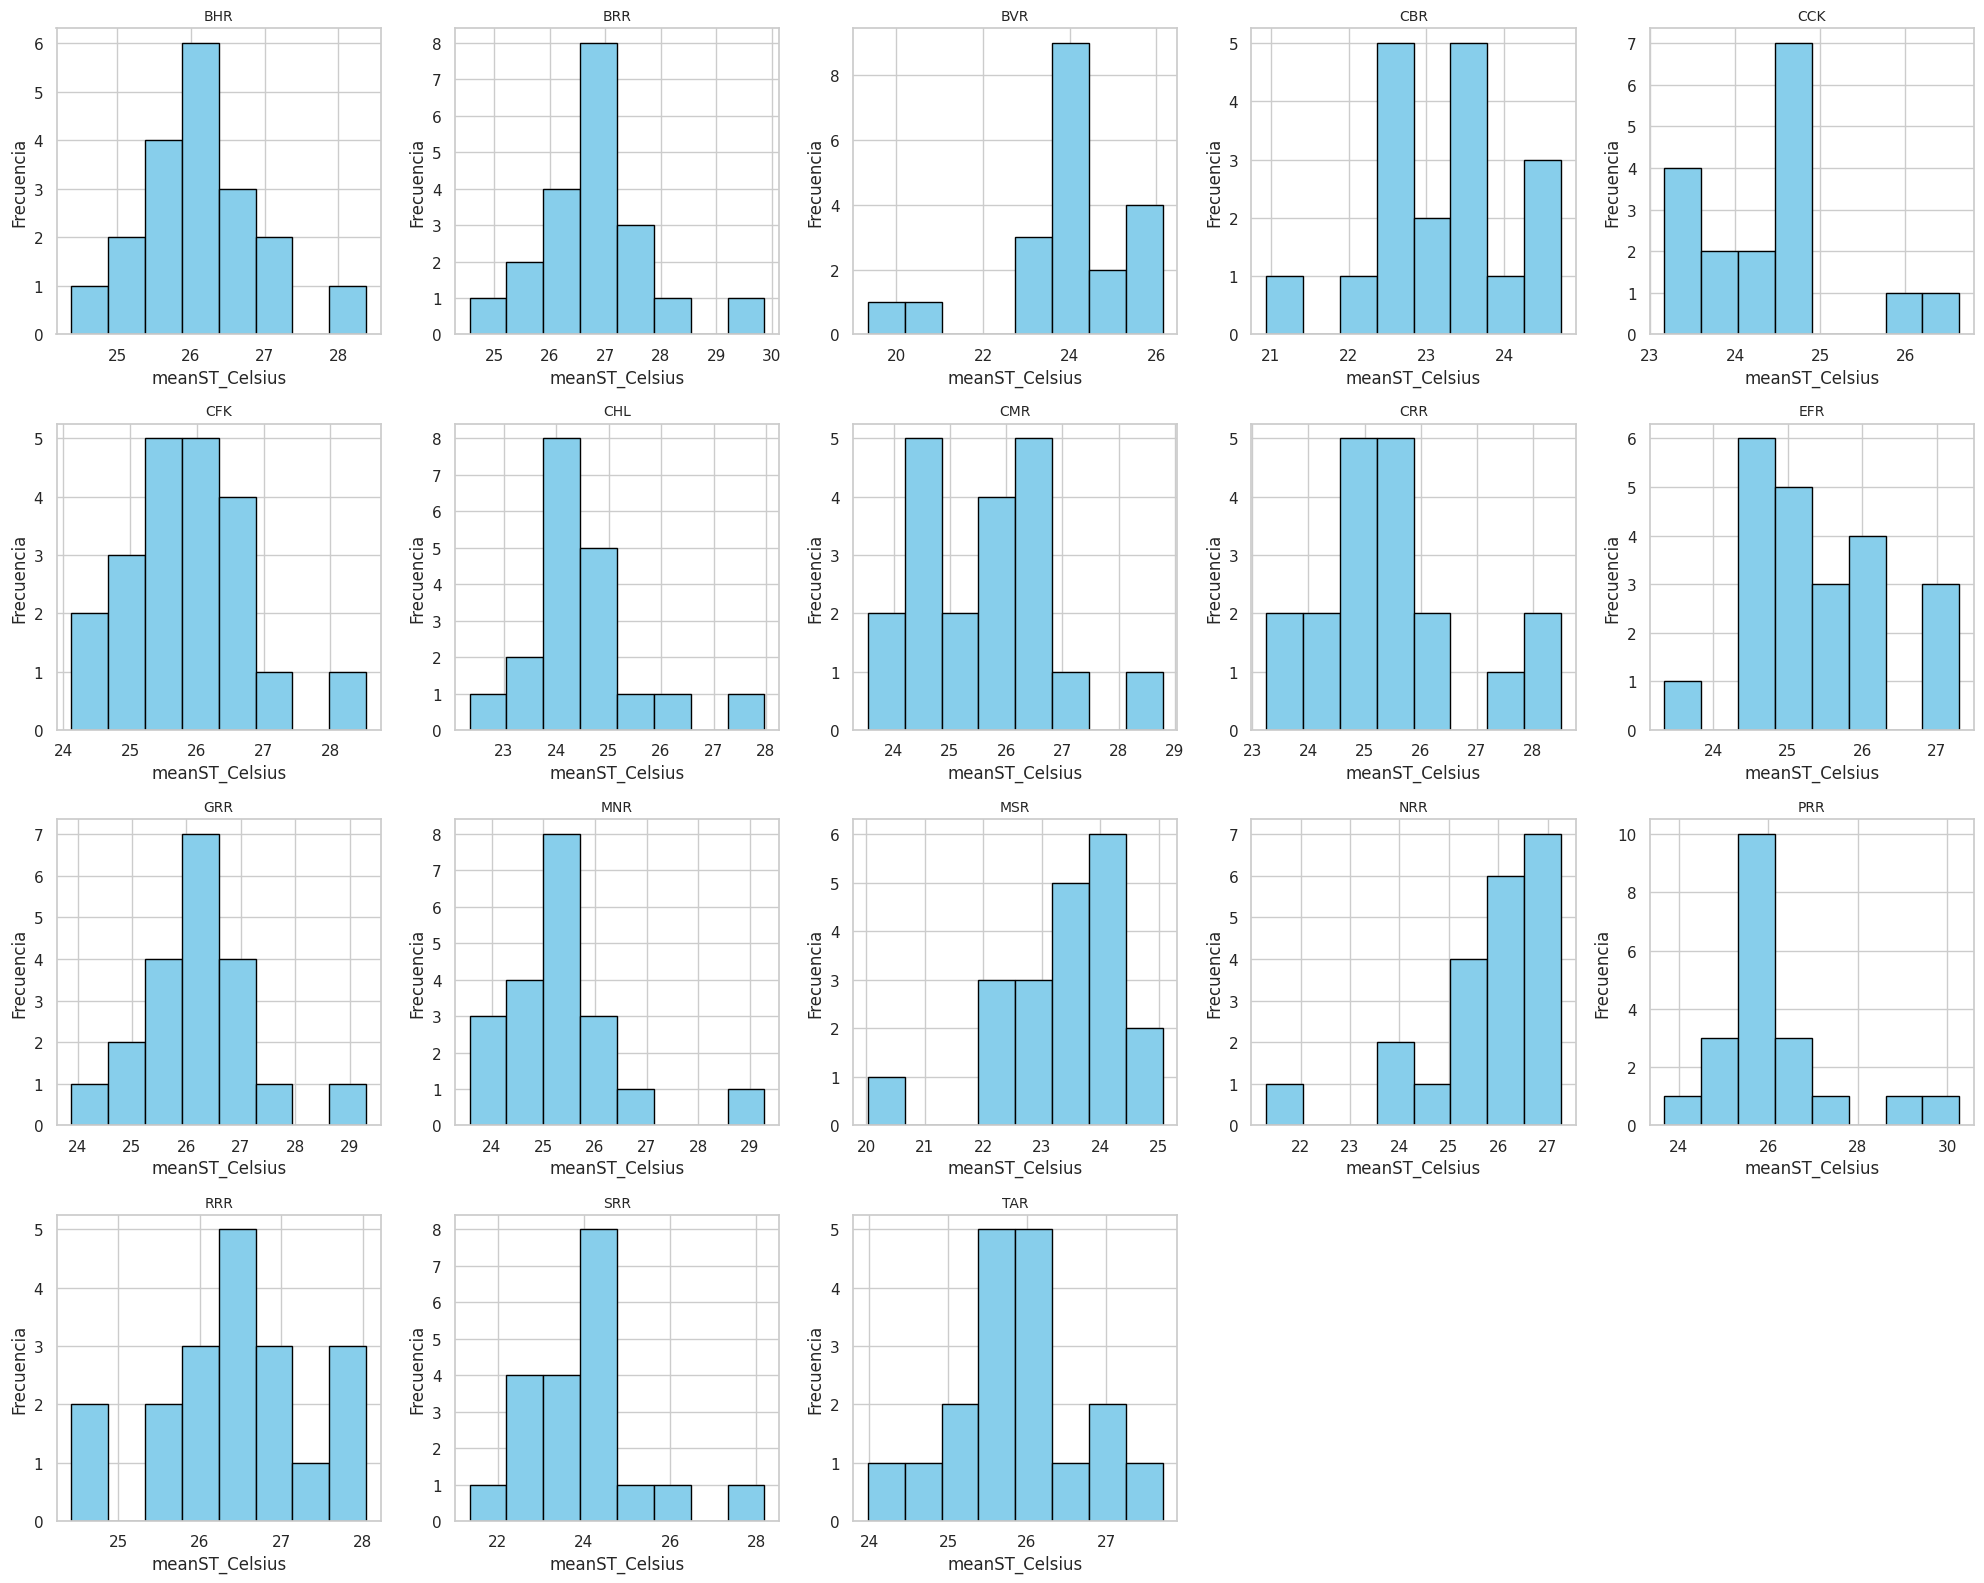

In [69]:
# Me fijo la distribución de la temperatura 'en superficie' en cada embalse
# para determinar si completo con la media o la mediana

# Filtrar filas sin datos nulos en la columna 'meanST_Celsius'
df_filtrado = df[['Reservoir', 'meanST_Celsius']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['meanST_Celsius']
    ax.hist(datos, bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('meanST_Celsius')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

Para la temperatura en superficie uso la misma logica

In [70]:
# Calcular la mediana de 'meanST_Celsius' por embalse
medianas_embalse = df.groupby('Reservoir')['meanST_Celsius'].transform('median')

# Rellenar los valores nulos con la mediana correspondiente de cada embalse
df['meanST_Celsius'] = df['meanST_Celsius'].fillna(medianas_embalse)

### Nutrientes

In [71]:
# El oxígeno disuelto fue medido en dos meses, hago un promedio  entre
# ambos para usar como variable
df['meanDO'] = df[['mayDO_mg/l', 'junDO_mg/l']].mean(axis=1)

Para completar los valores nulos de las mediciones de los distintos nutrientes tambien voy a tener en cuenta las diferencias entre embalses.

Analizo la distribución de valores de distintos nutrientres para determinas como completar los valores nulos

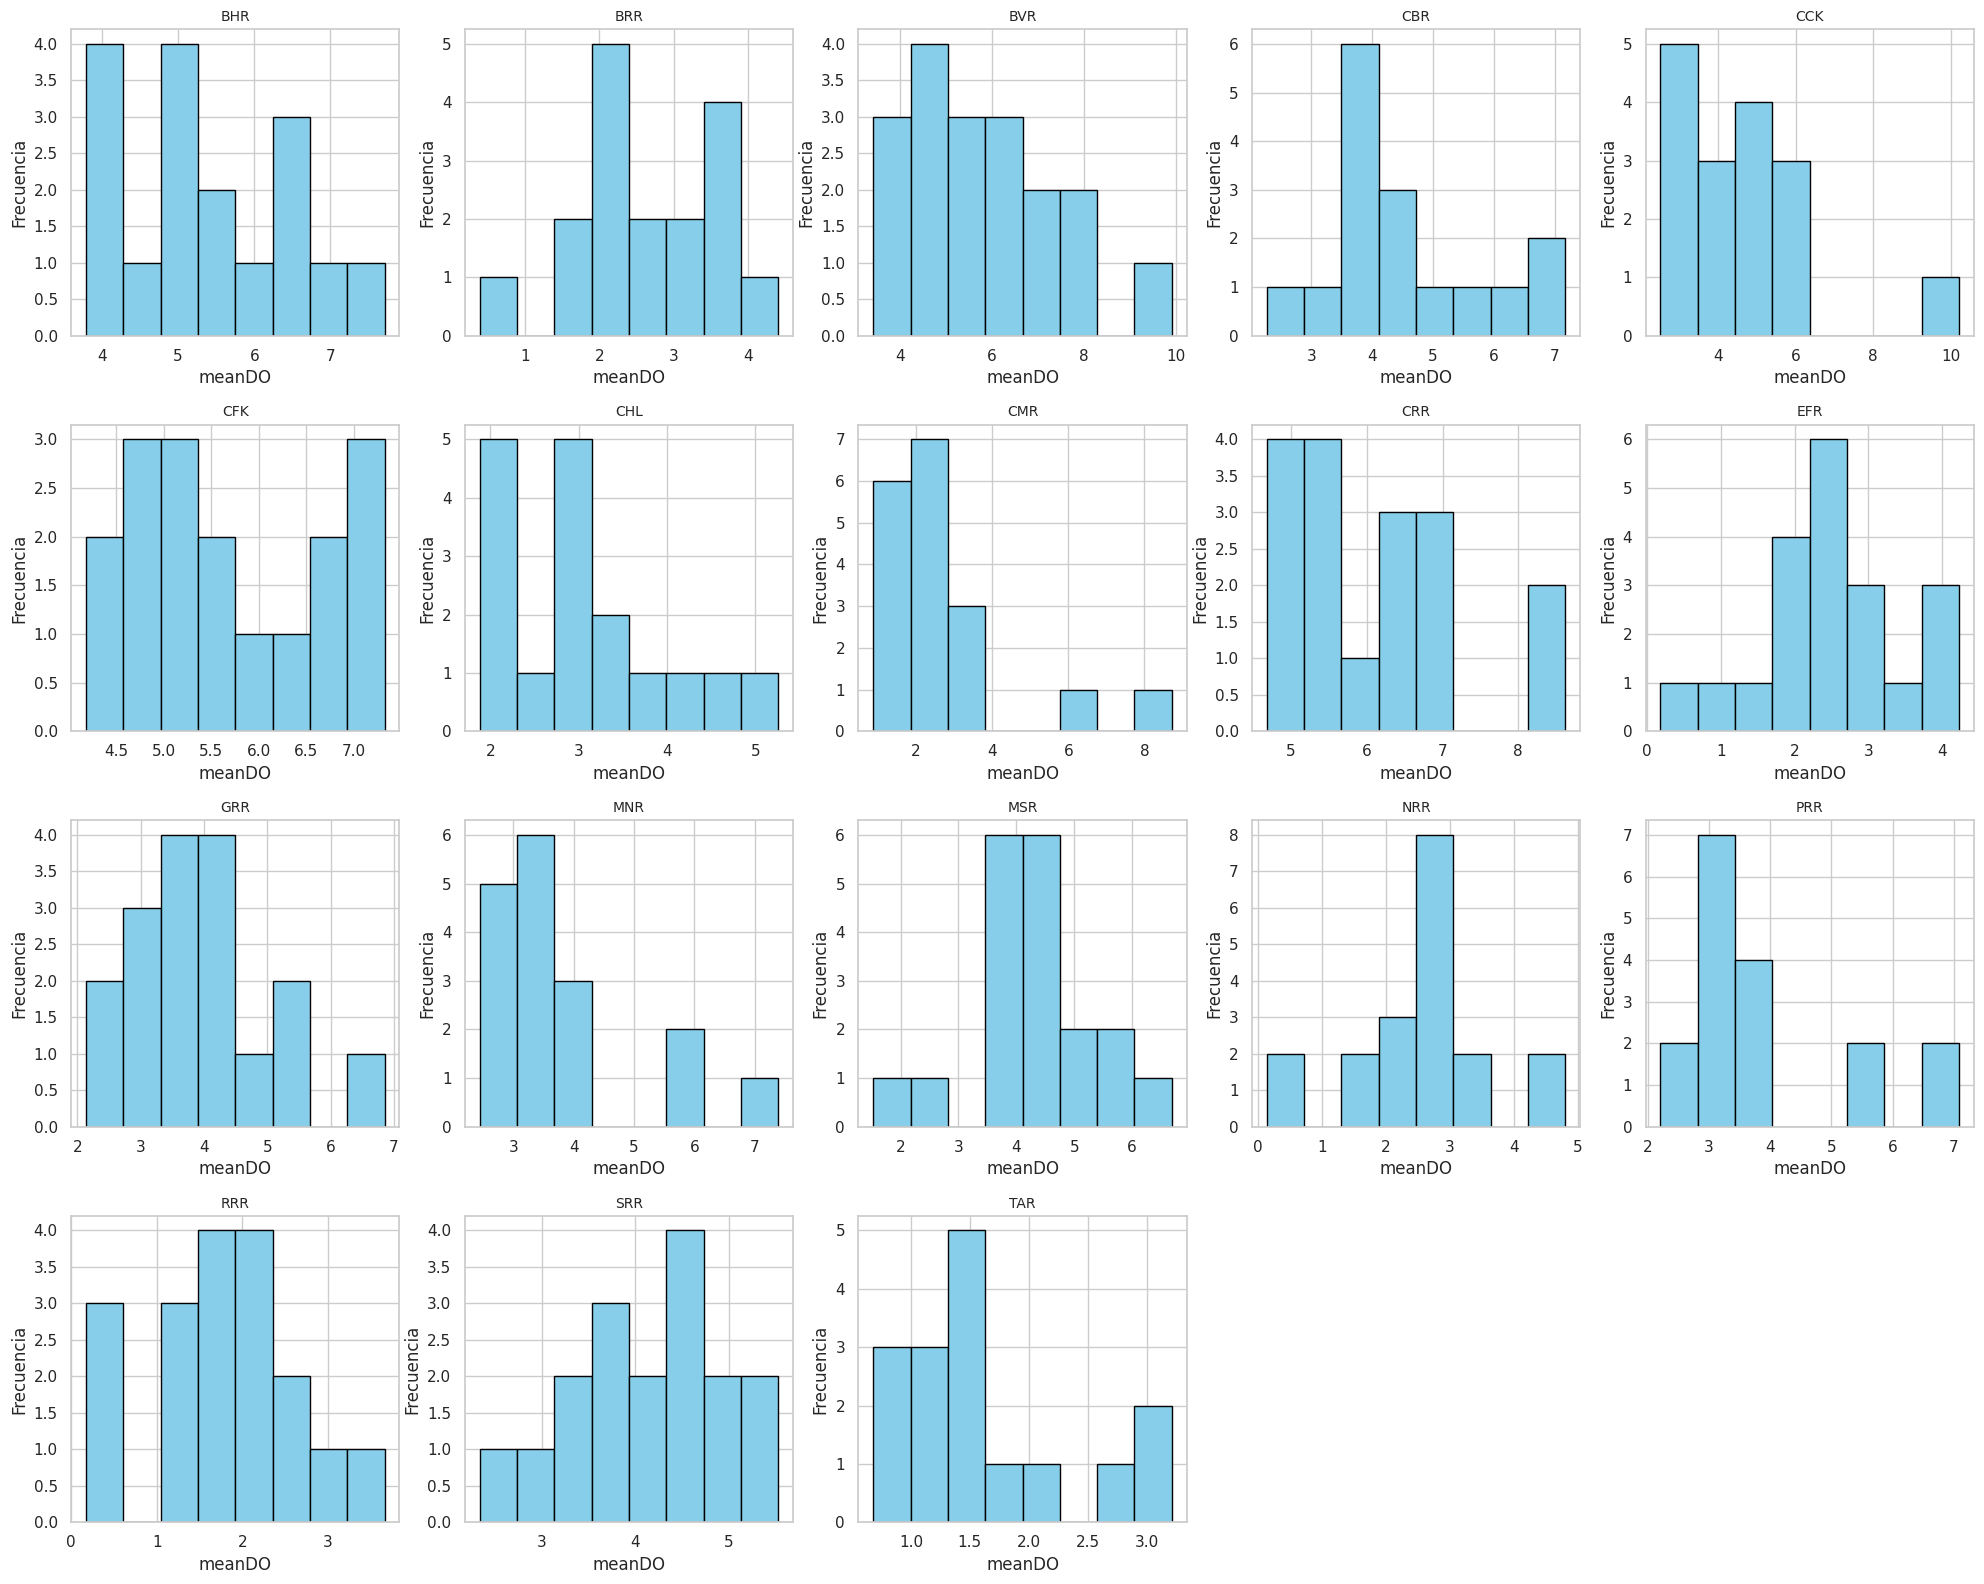

In [72]:
# Distribución del oxígeno disuelto

# Filtrar filas sin datos nulos en la columna 'meanDO'
df_filtrado = df[['Reservoir', 'meanDO']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['meanDO']
    ax.hist(datos, bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('meanDO')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

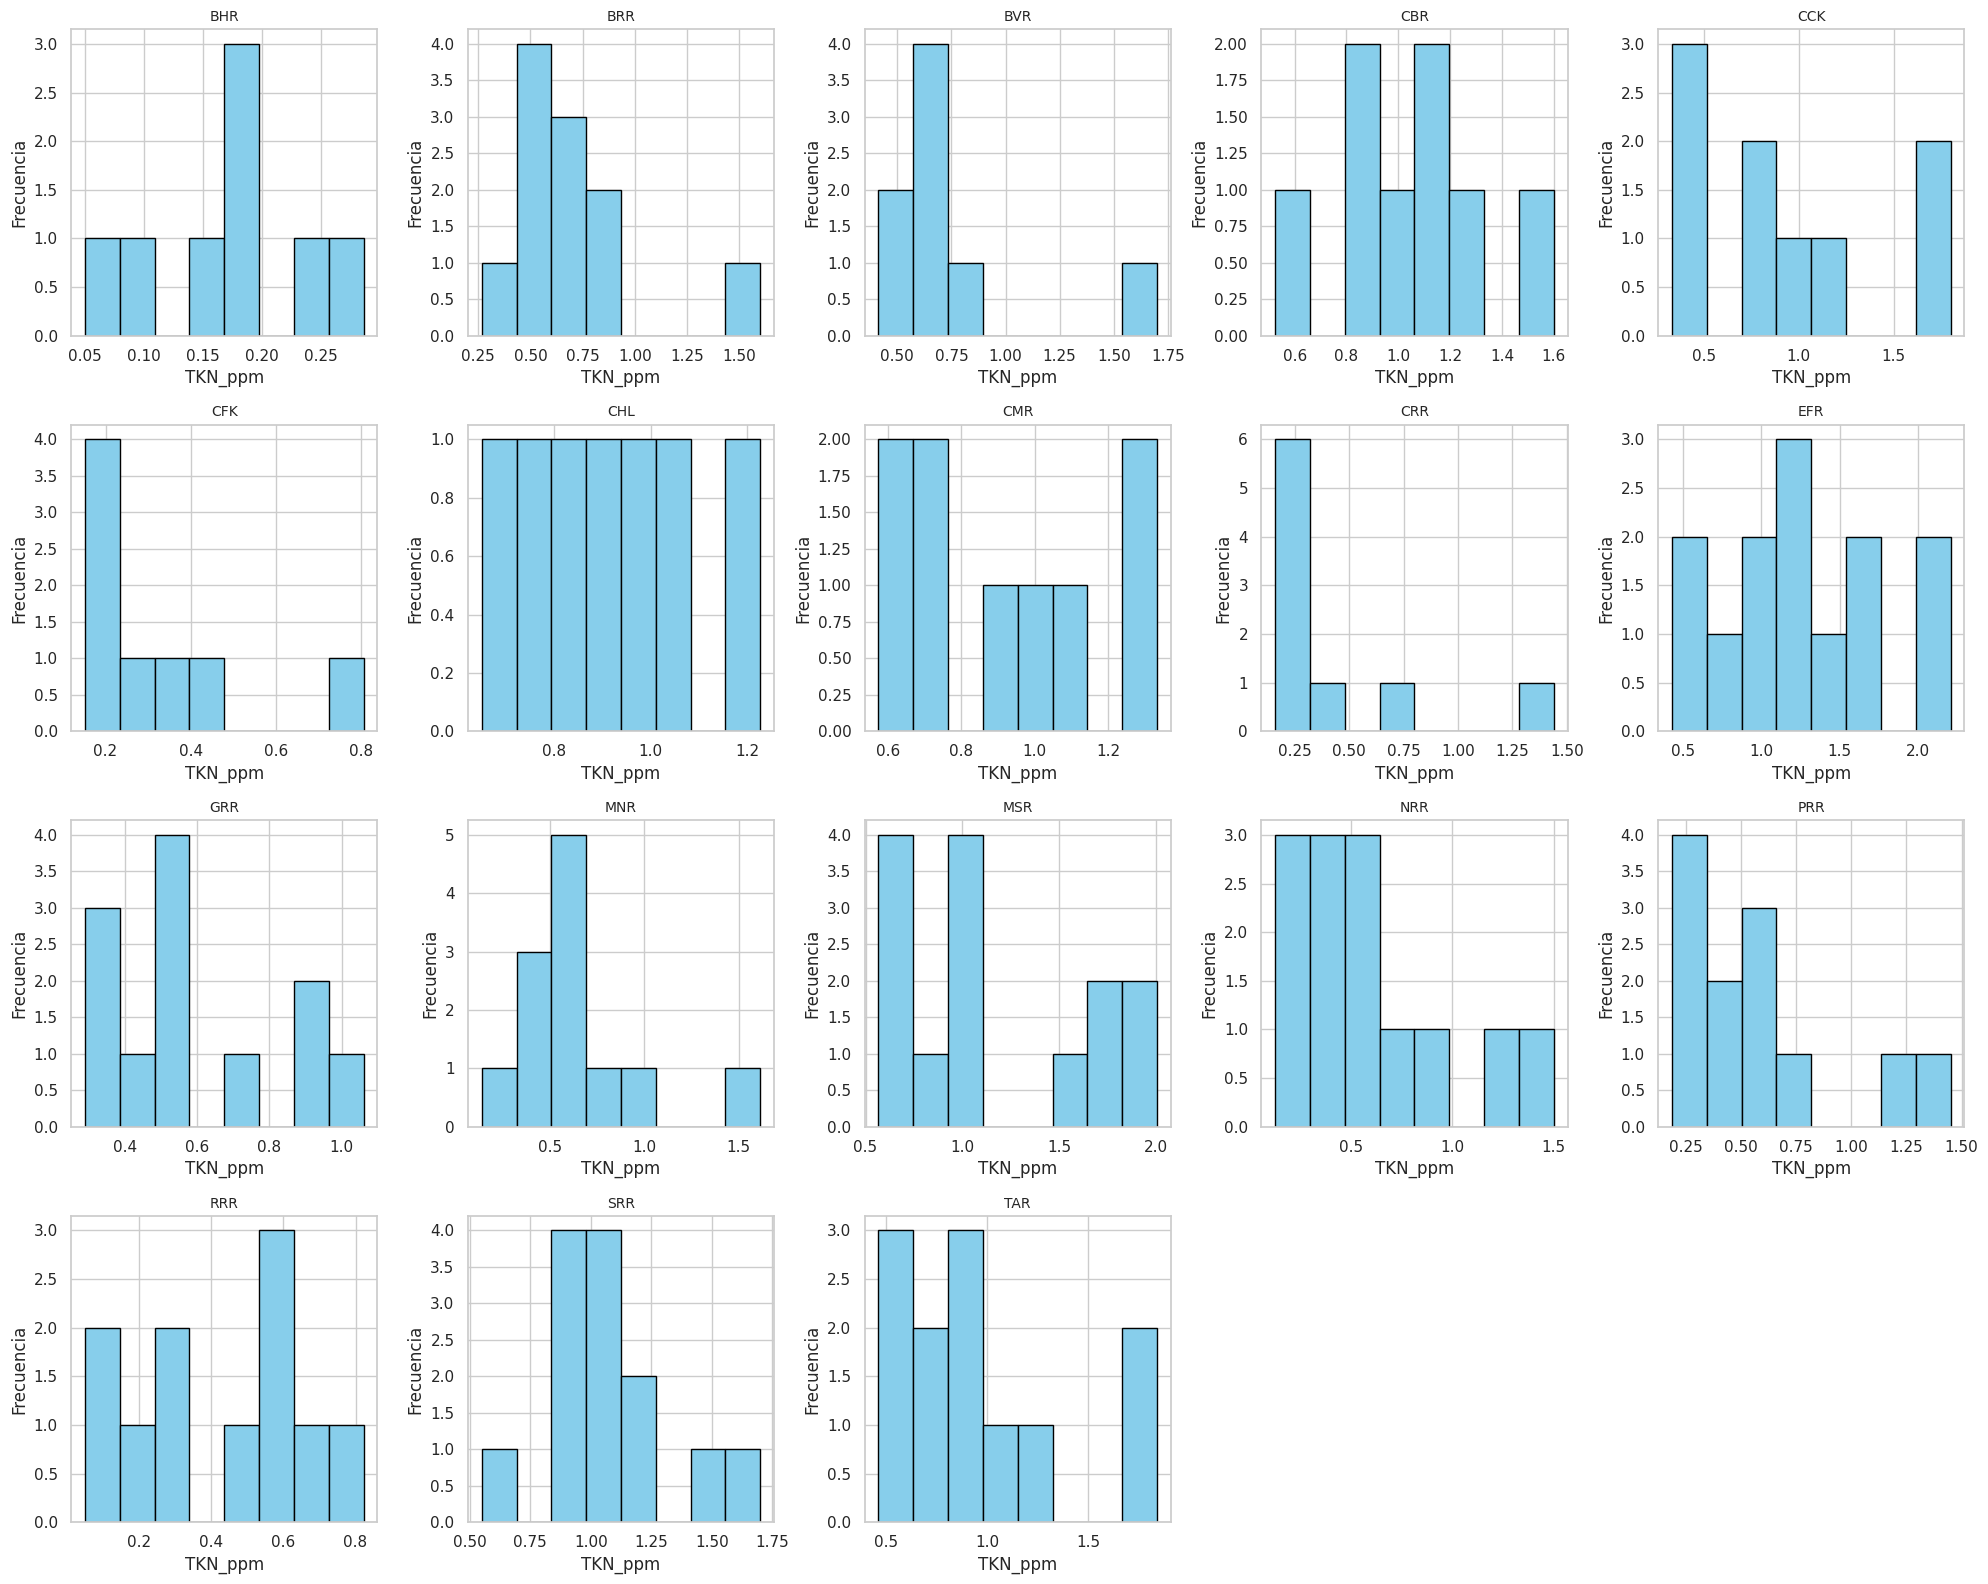

In [73]:
# Distribución del nitrógeno total de Kjeldahl

# Filtrar filas sin datos nulos en la columna 'TKN_ppm'
df_filtrado = df[['Reservoir', 'TKN_ppm']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['TKN_ppm']
    ax.hist(datos, bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('TKN_ppm')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

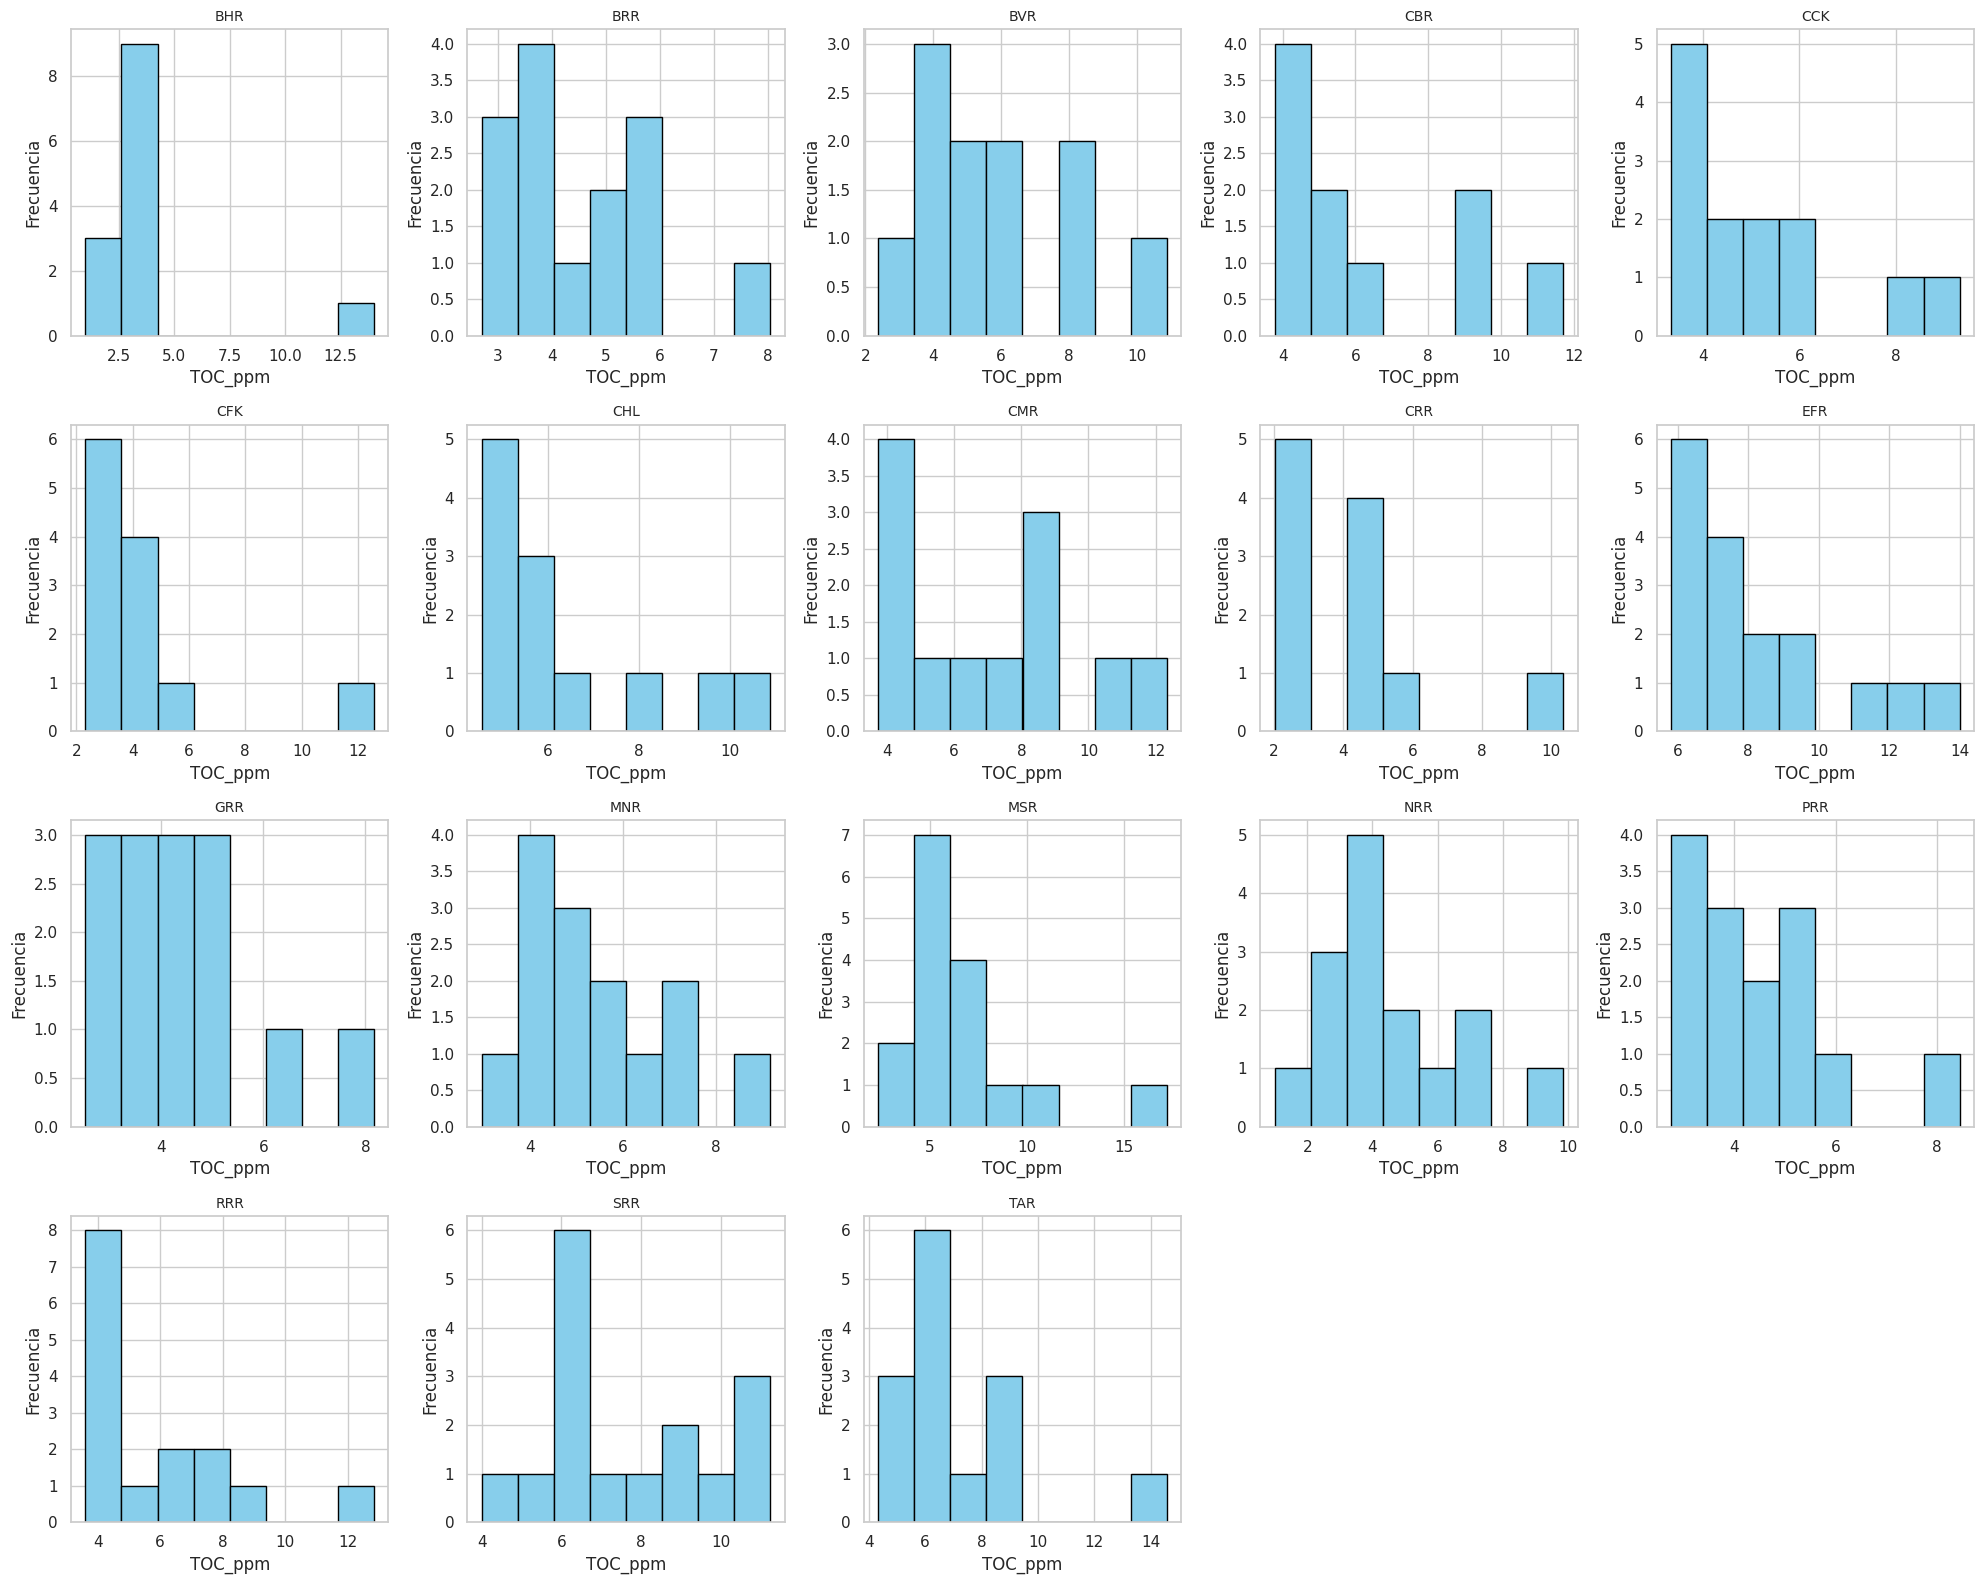

In [74]:
# Distribución del carbono orgánico total

# Filtrar filas sin datos nulos en la columna 'TOC_ppm'
df_filtrado = df[['Reservoir', 'TOC_ppm']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['TOC_ppm']
    ax.hist(datos, bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('TOC_ppm')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

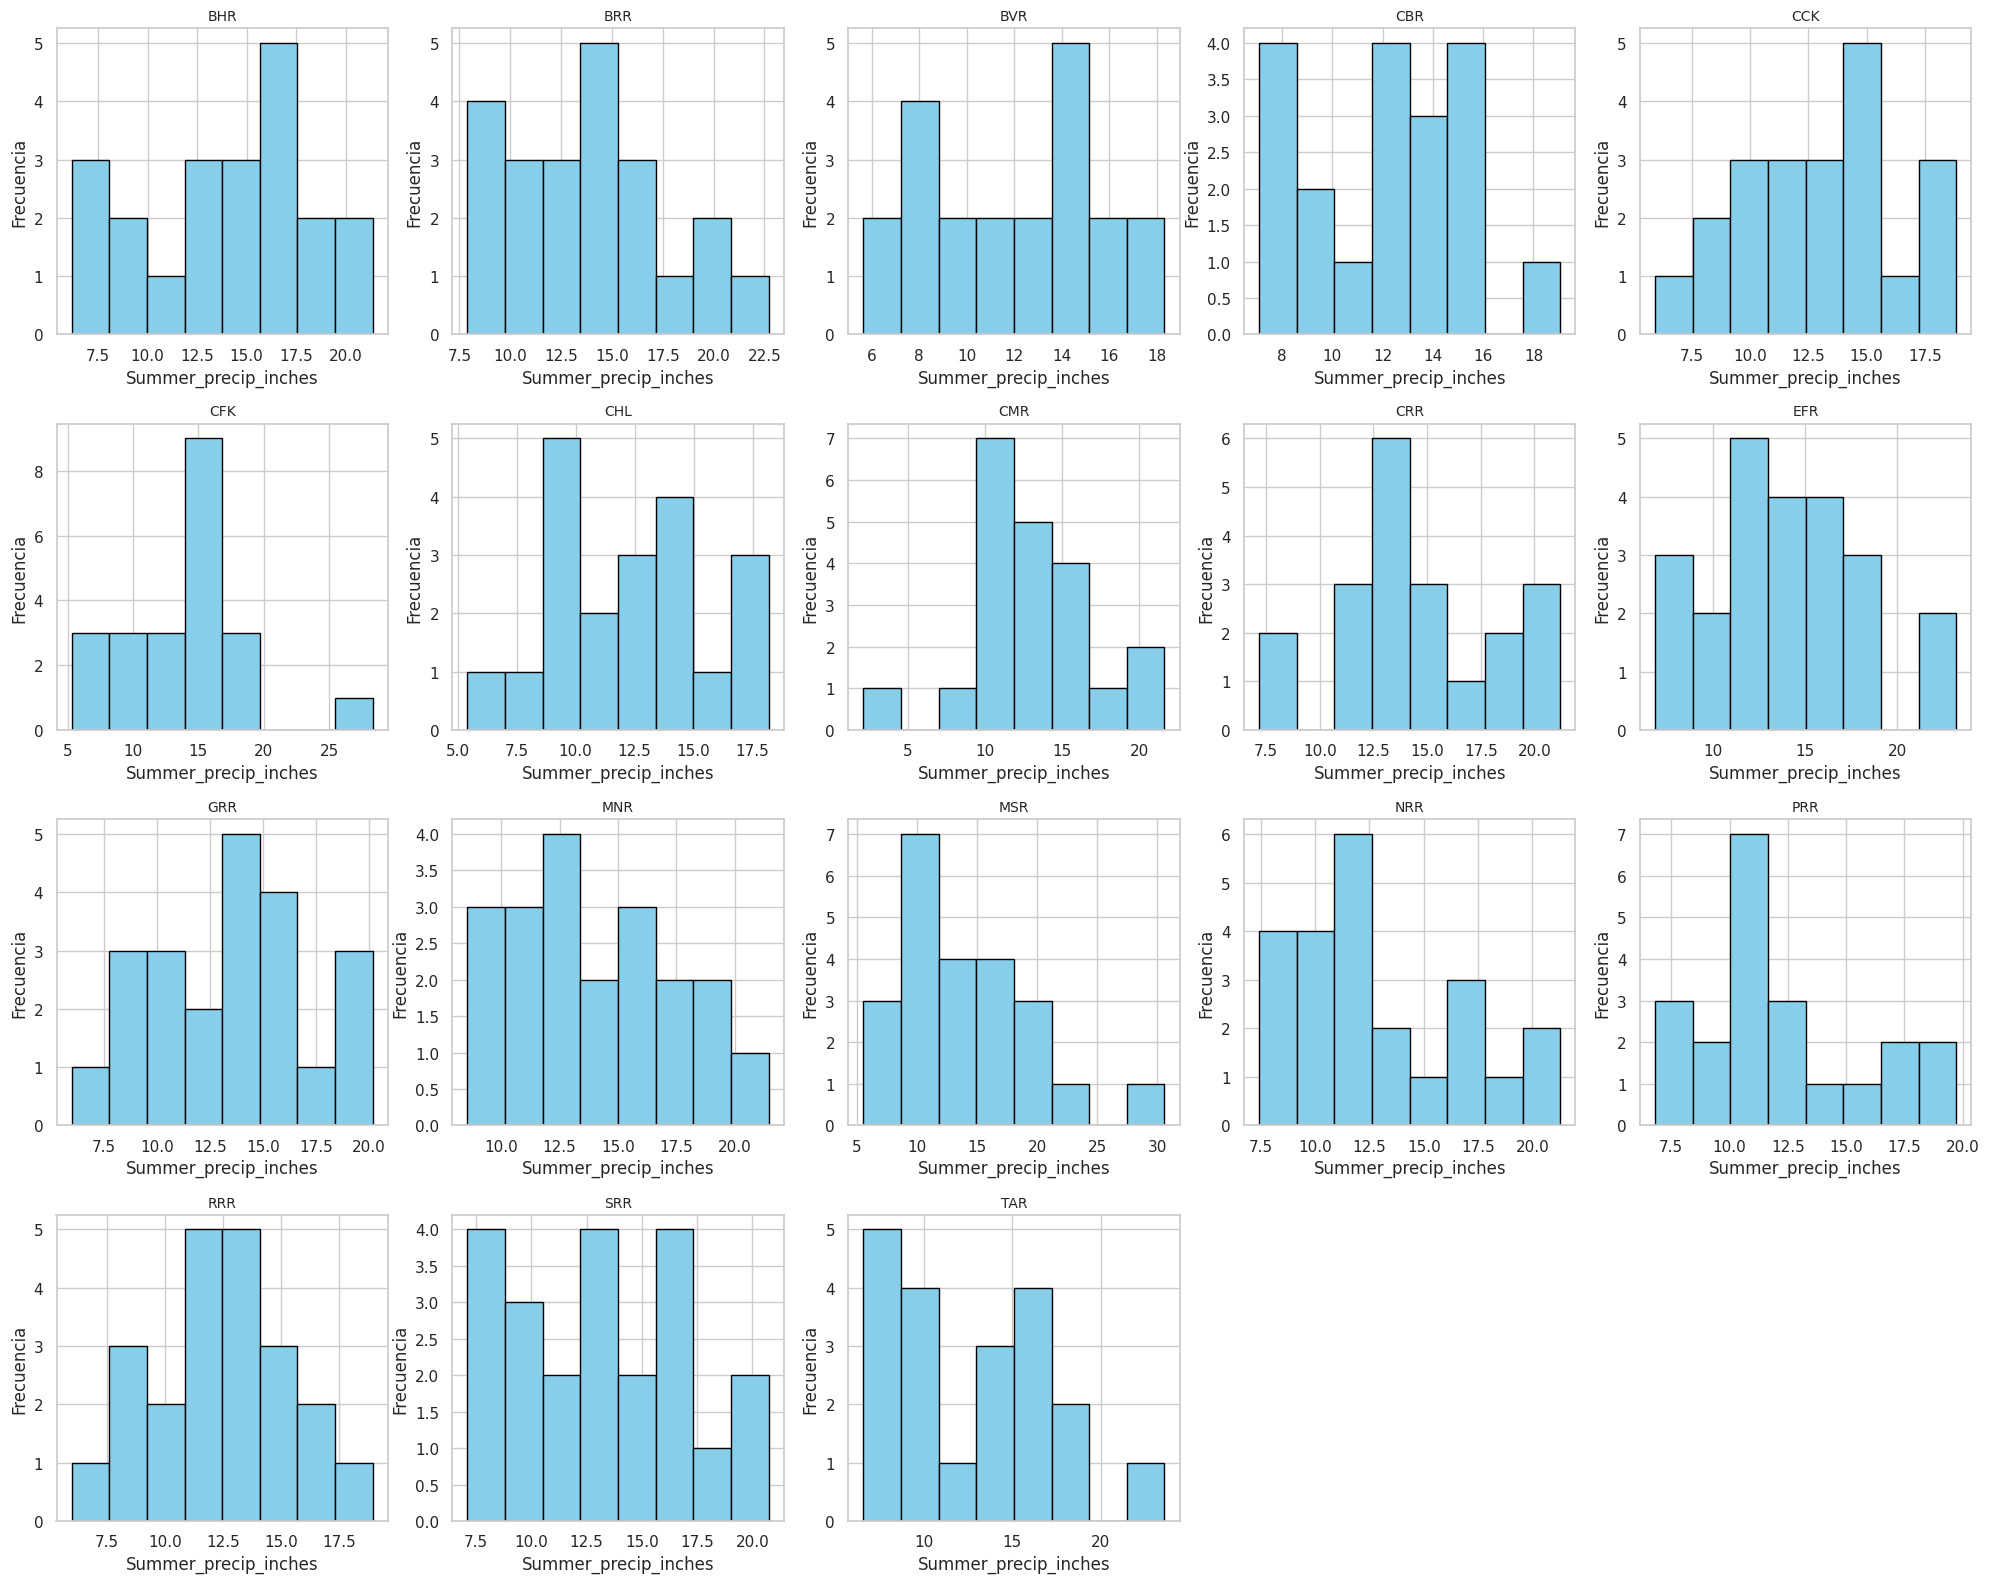

In [75]:
# Analizo tambien la distribución de las precipitaciones durante el verano

# Filtrar filas sin datos nulos en la columna 'Summer_precip_inches'
df_filtrado = df[['Reservoir', 'Summer_precip_inches']].dropna()

# Obtener los primeros 20 embalses únicos
embalses = df_filtrado['Reservoir'].unique()[:20]

# Crear una cuadrícula de 4x5 para los subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Generar histogramas para cada embalse en la cuadrícula
for ax, embalse in zip(axes.flatten(), embalses):
    datos = df_filtrado[df_filtrado['Reservoir'] == embalse]['Summer_precip_inches']
    ax.hist(datos, bins=8, color='skyblue', edgecolor='black')
    ax.set_title(f'{embalse}', fontsize=10)
    ax.set_xlabel('Summer_precip_inches')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si hay menos de 20 embalses
for ax in axes.flatten()[len(embalses):]:
    fig.delaxes(ax)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

Teniendo en cuenta que para los parámetros analizados se observa en general una distribución asimétrica o que no tienen una distribución definida, creo conveniente rellenar los nulos por la mediana de cada embalse.

In [76]:
# Lista de columnas para rellenar con la mediana por embalse
columnas = [
    'TP_ppb', 'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
    'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm', 'NOx6to8inflow_ppm',
    'TP6to8inflow_ppb', 'TOC6to8inflow_ppm', 'Summer_precip_inches', 'meanDO'
]

# Iterar sobre cada columna para calcular la mediana y rellenar nulos
for col in columnas:
    # Calcular la mediana por embalse (Reservoir)
    medianas_embalse = df.groupby('Reservoir')[col].transform('median')

    # Rellenar los valores nulos con la mediana correspondiente
    df[col] = df[col].fillna(medianas_embalse)

print("Terminado")

Terminado


Algunos embalses no tienen registros de mediciones en los afluentes al embalse. Verifico cuales son:

In [77]:
# Filtrar los embalses con valores nulos en la columna 'NH36to8inflow_ppm'
embalses_con_nulos = df[df['NH36to8inflow_ppm'].isnull()]['Reservoir'].unique()

# Mostrar los embalses con nulos
print("Embalses con valores nulos en 'NH36to8inflow_ppm':")
print(embalses_con_nulos)


Embalses con valores nulos en 'NH36to8inflow_ppm':
['SRR']


Como es uno solo lo elimino del dataset

In [78]:
# Eliminar las filas donde el embalse es 'SRR'
df = df[df['Reservoir'] != 'SRR']

# Verificar que se eliminó correctamente
print(f"Filas restantes: {len(df)}")
print(df['Reservoir'].unique())  # Lista de embalses restantes

Filas restantes: 361
['BHR' 'BRR' 'BVR' 'CBR' 'CCK' 'CFK' 'CHL' 'CMR' 'CRR' 'EFR' 'GRR' 'MNR'
 'MSR' 'NRR' 'PRR' 'RRR' 'TAR']


In [79]:
print(df.isnull().sum())

Reservoir                       0
Reservoir_type                  0
Year                            0
Cyanobacteria_Max_cells/ml      0
logCyanoMax_cells/ml            0
Chlorophyll_a_ug/l            219
Secchi_cm                      20
TP_ppb                          0
P_dissolved_ppb                 0
TKN_ppm                         0
NH3_ppm                         0
NOx_ppm                         0
TOC_ppm                         0
Alkalinity_ppm                  0
NH36to8inflow_ppm               0
TKN6to8inflow_ppm               0
NOx6to8inflow_ppm               0
TP6to8inflow_ppb                0
TOC6to8inflow_ppm               0
Summer_precip_inches            0
Summer_precip_Z-score           0
mayST_Celsius                  75
junST_Celsius                  66
julST_Celsius                  58
augST_Celsius                  44
mayDO_mg/l                     76
junDO_mg/l                     69
mayDT_Celsius                  76
junDT_Celsius                  67
julDT_Celsius 

Genero la tabla solo con las columnas que se van a utilizar para el análisis exploratorio

In [80]:
df = df[['Reservoir', 'Reservoir_type', 'Year', 'Cyanobacteria_Max_cells/ml', 'TP_ppb',
       'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
       'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm',
       'NOx6to8inflow_ppm', 'TP6to8inflow_ppb', 'TOC6to8inflow_ppm',
       'Summer_precip_inches', 'meanST_Celsius', 'meanDT_Celsius', 'meanDO']]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 1 to 607
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reservoir                   361 non-null    object 
 1   Reservoir_type              361 non-null    int64  
 2   Year                        361 non-null    int64  
 3   Cyanobacteria_Max_cells/ml  361 non-null    float64
 4   TP_ppb                      361 non-null    float64
 5   P_dissolved_ppb             361 non-null    float64
 6   TKN_ppm                     361 non-null    float64
 7   NH3_ppm                     361 non-null    float64
 8   NOx_ppm                     361 non-null    float64
 9   TOC_ppm                     361 non-null    float64
 10  Alkalinity_ppm              361 non-null    float64
 11  NH36to8inflow_ppm           361 non-null    float64
 12  TKN6to8inflow_ppm           361 non-null    float64
 13  NOx6to8inflow_ppm           361 non-null

No quedaron valores nulos y me quedo con datos de 17 embalses

# Análisis Exploratorio

## Cual fue la tendencia de aparición de floraciones durante los años?

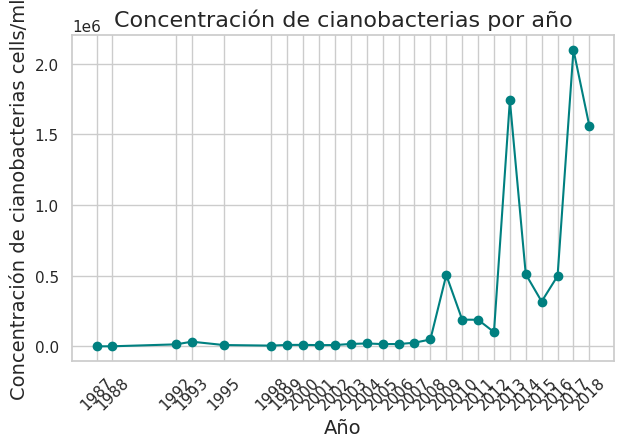

In [82]:
# Calcular la concentración máxima promedio de cianobacterias por año
promedio_cianobacterias = df.groupby('Year')['Cyanobacteria_Max_cells/ml'].mean()

plt.plot(promedio_cianobacterias.index, promedio_cianobacterias.values, marker='o', linestyle='-', color='teal')

plt.title('Concentración de cianobacterias por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Concentración de cianobacterias cells/ml', fontsize=14)
plt.grid(True)
plt.xticks(promedio_cianobacterias.index, rotation=45)

plt.tight_layout()
plt.show()


In [83]:
# Paso a logaritmo la concentración de cianobacteiras para ver mejor la relación
df['cyano_log']= np.log(df['Cyanobacteria_Max_cells/ml'])

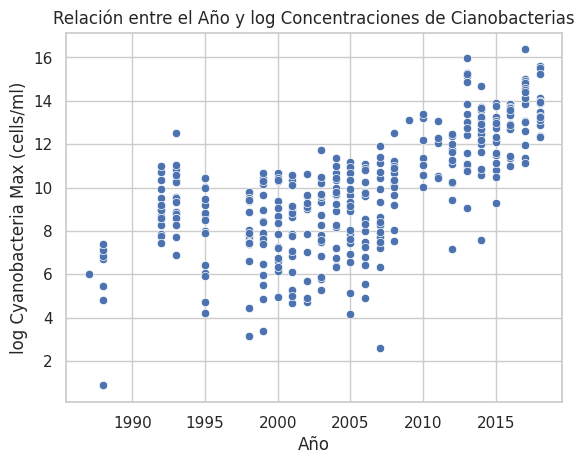

In [84]:
# Transformado a logarítmo

sns.scatterplot(x=df['Year'], y=df['cyano_log'])

# Opcional: definir límites en el eje Y si es necesario
plt.ylim()  # Ajusta según tu caso

# Título y etiquetas
plt.title("Relación entre el Año y log Concentraciones de Cianobacterias")
plt.xlabel("Año")
plt.ylabel("log Cyanobacteria Max (cells/ml)")

# Mostrar el gráfico
plt.show()

Se observa que a nivel global la concentración maxima de cianobacterias promedio aumentó

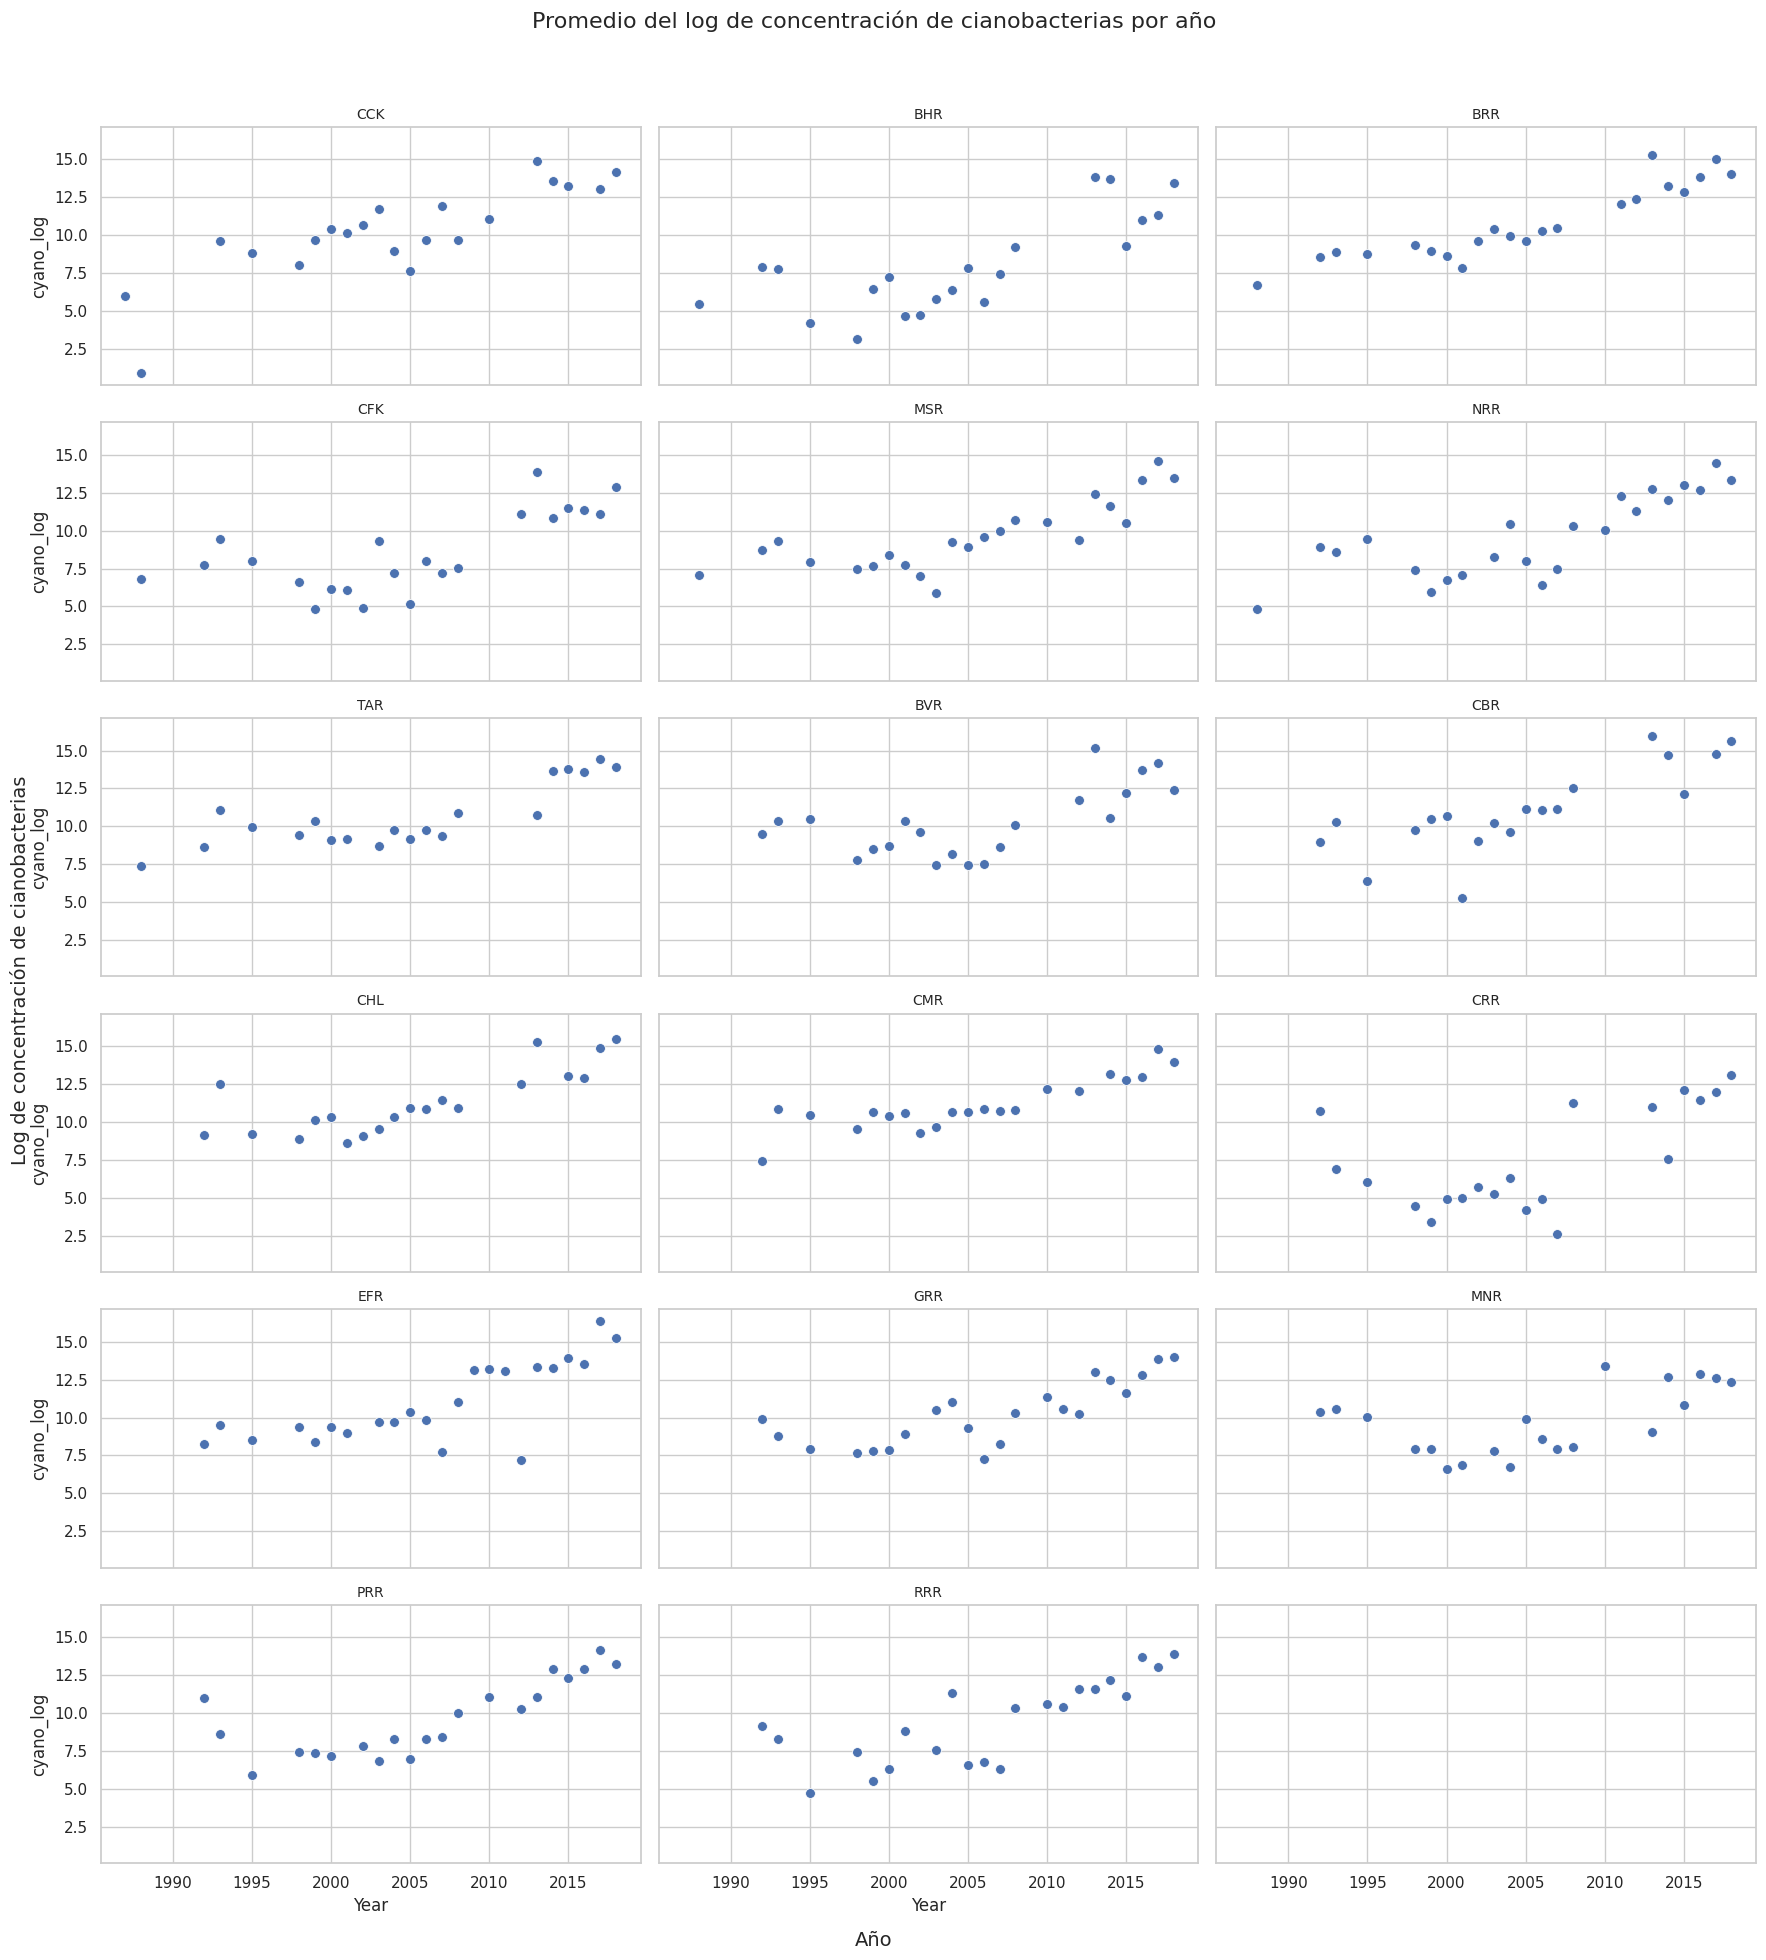

In [85]:
# Observo como cambió la concentracion de cianobacterias (escala logarítmica)
# en los distintos embalses

# Calcular la concentración promedio de cianobacterias por embalse y año
promedio_por_embalse = df.groupby(['Year', 'Reservoir'])['cyano_log'].mean().reset_index()

# Obtener la lista de embalses
embalses = promedio_por_embalse['Reservoir'].unique()

# Crear subplots (6 filas x 3 columnas para 17 embalses)
fig, axes = plt.subplots(6, 3, figsize=(18, 20), sharex=True, sharey=True)

# Recorrer cada embalse y graficarlo
for ax, embalse in zip(axes.flatten(), embalses):
    # Filtrar los datos del embalse actual
    data = promedio_por_embalse[promedio_por_embalse['Reservoir'] == embalse]

    # Graficar el embalse como scatterplot
    sns.scatterplot(data=data, x='Year', y='cyano_log', ax=ax, s=50)
    ax.set_title(f'{embalse}', fontsize=10)
    ax.grid(True)

# Ajustar etiquetas de ejes y espacio entre gráficos
fig.suptitle('Promedio del log de concentración de cianobacterias por año', fontsize=16)
fig.supxlabel('Año', fontsize=14)
fig.supylabel('Log de concentración de cianobacterias', fontsize=14)

# Ajustar espacio entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()



En general, se observa que hubo un aumento de cianobacterias en todos los embalses

## ¿Existen diferencias en la concentración de cianobacterias entre distintos cuerpos de agua y tipos de ambiente?

In [86]:
df.pivot_table(values='Cyanobacteria_Max_cells/ml', index='Reservoir_type')

,Cyanobacteria_Max_cells/ml
Reservoir_type,
1,106737.385268
2,392517.788827
3,462958.512506


El tipo de embalse 1 es el que tiene en promedio menos concentración de cianobacterias (el que tiene menor intervencion humana)

(Reservoir_type: 1 = forested with stratification, 2 = agricultural with stratification, 3 = weak or no stratification (7 agricultural and 1 urban)

In [87]:
df.pivot_table(values='Cyanobacteria_Max_cells/ml', index=['Reservoir_type','Reservoir'])

Cyanobacteria_Max_cells/ml
Reservoir_type Reservoir                            
1              BHR                      1.355284e+05
               CFK                      8.344016e+04
               CRR                      5.546333e+04
               MNR                      1.036050e+05
               PRR                      1.541687e+05
2              BRR                      5.186699e+05
               BVR                      3.287038e+05
               CCK                      3.122325e+05
               EFR                      9.443706e+05
               GRR                      1.706318e+05
               RRR                      1.410710e+05
               TAR                      2.910900e+05
3              CBR                      1.079755e+06
               CHL                      7.141750e+05
               CMR                      2.838431e+05
               MSR                      1.760591e+05
               NRR                      1.854218e+05

EL embalse con mayor concentración de cianobacterias promedio es CBR (zona de agricultura no estratificada)

## ¿Qué nutrientes tienen mayor impacto en la aparición de florecimientos?

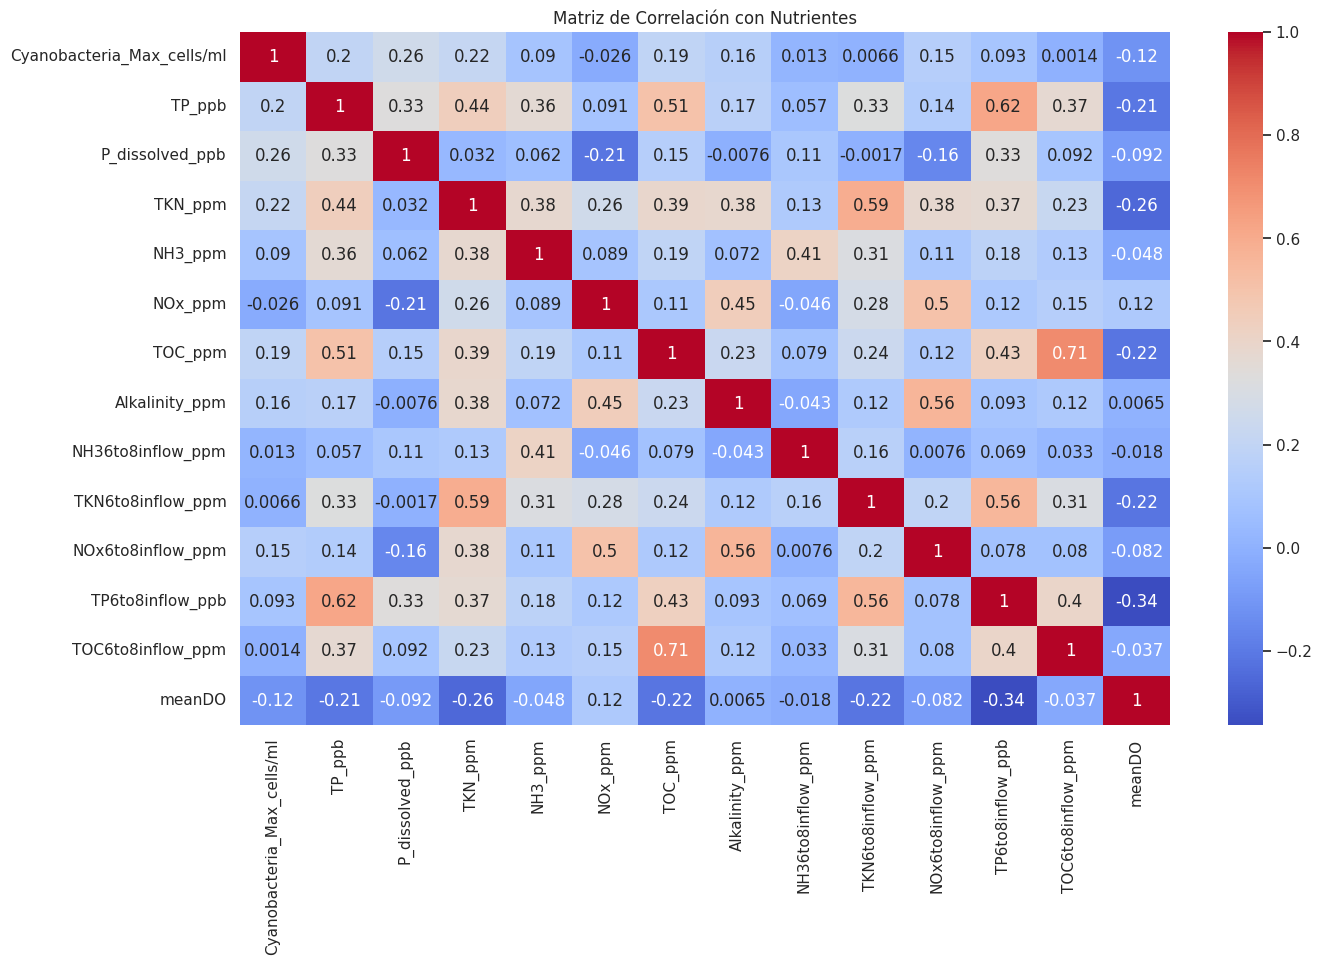

In [88]:
# Matriz de correlación
columnas_deseadas = ['Cyanobacteria_Max_cells/ml', 'TP_ppb',
       'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
       'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm',
       'NOx6to8inflow_ppm', 'TP6to8inflow_ppb', 'TOC6to8inflow_ppm', 'meanDO']

df_filtrado = df[columnas_deseadas]

corr = df_filtrado.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Nutrientes')
plt.show()

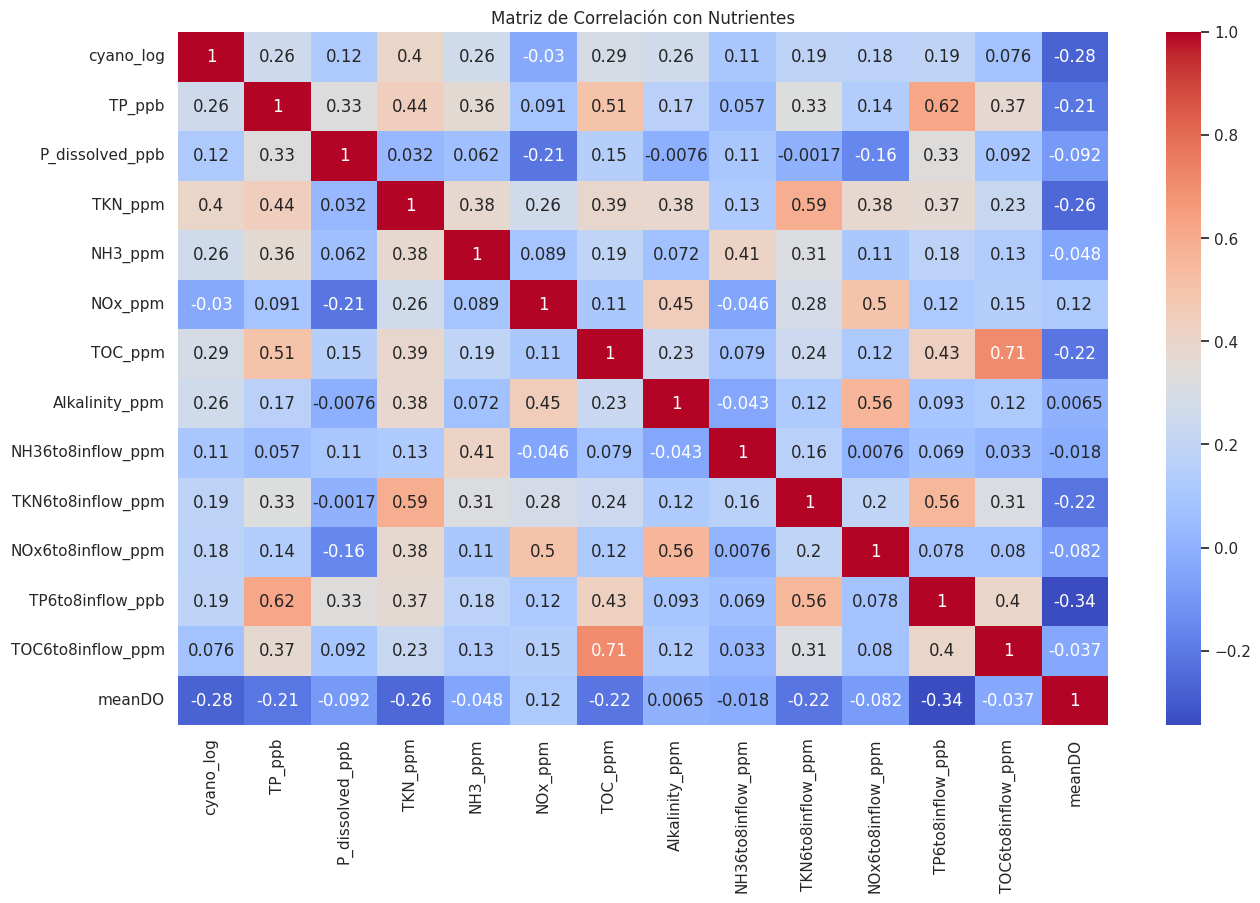

In [89]:
# # Matriz de correlación (cianobacterias en escala logarítmica)
columnas_deseadas = ['cyano_log', 'TP_ppb',
       'P_dissolved_ppb', 'TKN_ppm', 'NH3_ppm', 'NOx_ppm', 'TOC_ppm',
       'Alkalinity_ppm', 'NH36to8inflow_ppm', 'TKN6to8inflow_ppm',
       'NOx6to8inflow_ppm', 'TP6to8inflow_ppb', 'TOC6to8inflow_ppm', 'meanDO']

df_filtrado = df[columnas_deseadas]

corr = df_filtrado.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Nutrientes')
plt.show()

Las variables que tienen más correlación con la concentración de cianobacterias (en escala logarítmica) son el Nitrógeno Total (TKN), el Carbono Orgánico Total (TOC) y en menor medida el Fósforo Total (TP), la Alcalinidad y el Amoníaco Total (NH3).

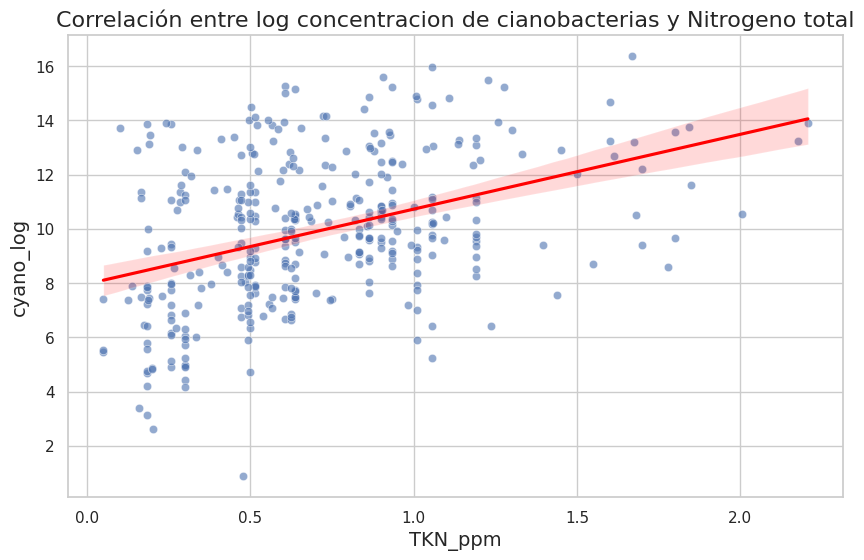

In [90]:
# Relación entre el Nitrogeno total (TKN) y cianobacterias

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='cyano_log', x='TKN_ppm', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, y='cyano_log', x='TKN_ppm', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre log concentracion de cianobacterias y Nitrogeno total', fontsize=16)
plt.ylabel('cyano_log', fontsize=14)
plt.xlabel('TKN_ppm', fontsize=14)

# Mostrar el gráfico
plt.show()

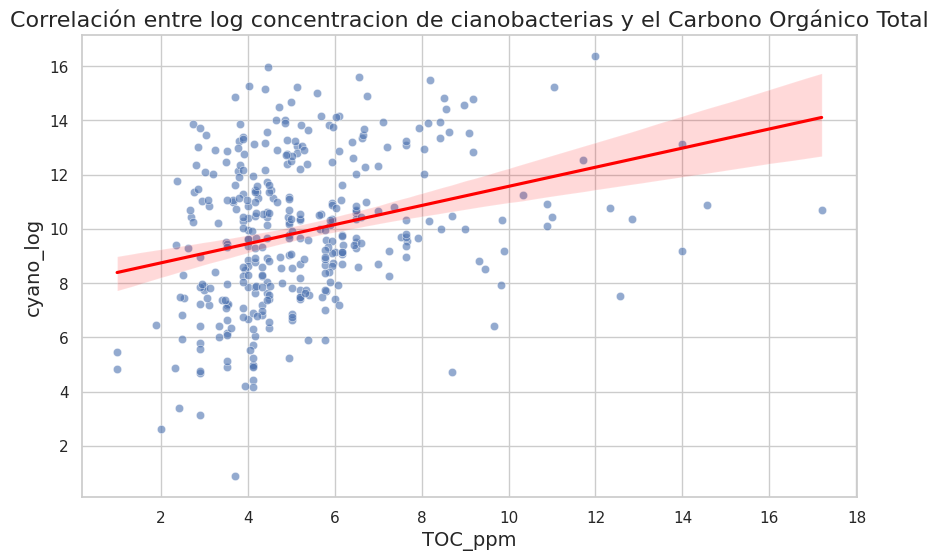

In [91]:
# Relación entre el Carbono Orgánico Total (TOC) y cianobacterias

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='cyano_log', x='TOC_ppm', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, y='cyano_log', x='TOC_ppm', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre log concentracion de cianobacterias y el Carbono Orgánico Total', fontsize=16)
plt.ylabel('cyano_log', fontsize=14)
plt.xlabel('TOC_ppm', fontsize=14)

# Mostrar el gráfico
plt.show()

## ¿Es más relevante la temperatura en profundidad agua que en la superficie para el crecimiento de cianobacterias?

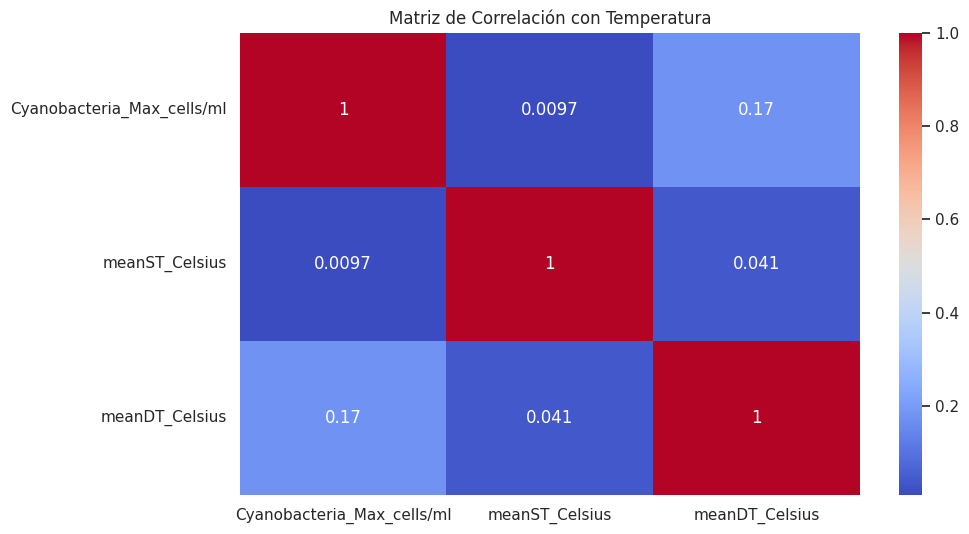

In [92]:
# Matriz de correlación
columnas_deseadas = ['Cyanobacteria_Max_cells/ml', 'meanST_Celsius', 'meanDT_Celsius']

df_filtrado = df[columnas_deseadas]

corr = df_filtrado.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Temperatura')
plt.show()

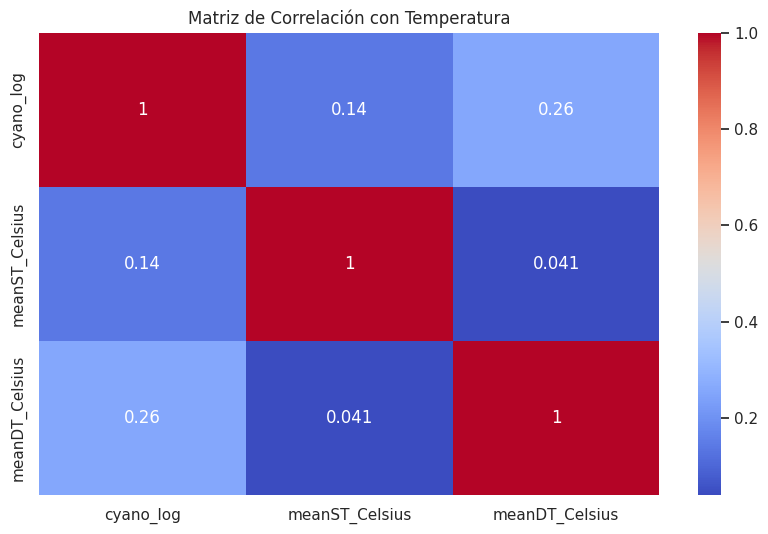

In [93]:
# Matriz de correlación (cianobacterias en escala logaritmica)
columnas_deseadas = ['cyano_log', 'meanST_Celsius', 'meanDT_Celsius']

df_filtrado = df[columnas_deseadas]

corr = df_filtrado.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Temperatura')
plt.show()

Se observa mayor correlación con la temperatura en profundidad que en superficie del agua

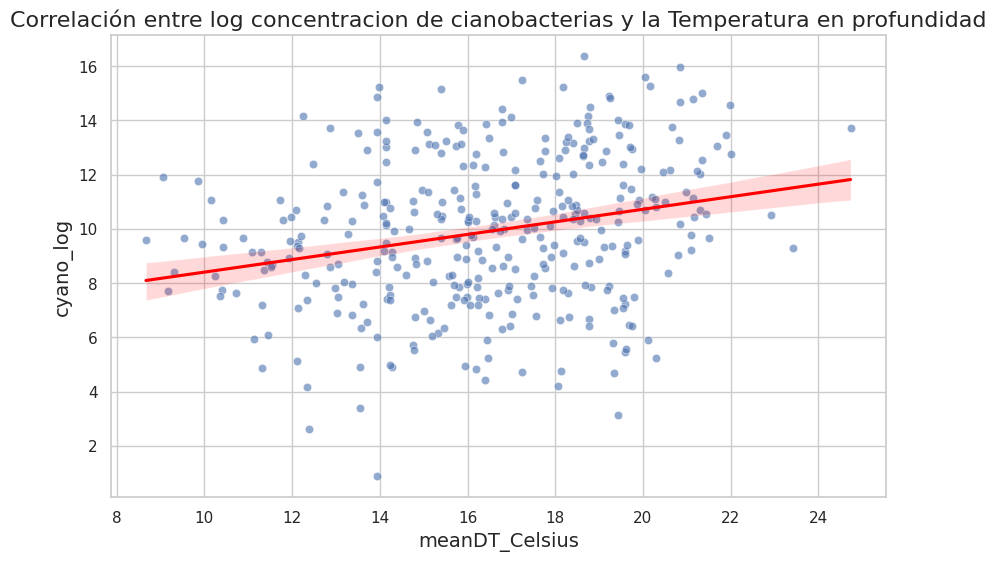

In [94]:
# Relación entre la Temperatura en profundidad y cianobacterias

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='cyano_log', x='meanDT_Celsius', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, y='cyano_log', x='meanDT_Celsius', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre log concentracion de cianobacterias y la Temperatura en profundidad', fontsize=16)
plt.ylabel('cyano_log', fontsize=14)
plt.xlabel('meanDT_Celsius', fontsize=14)

# Mostrar el gráfico
plt.show()

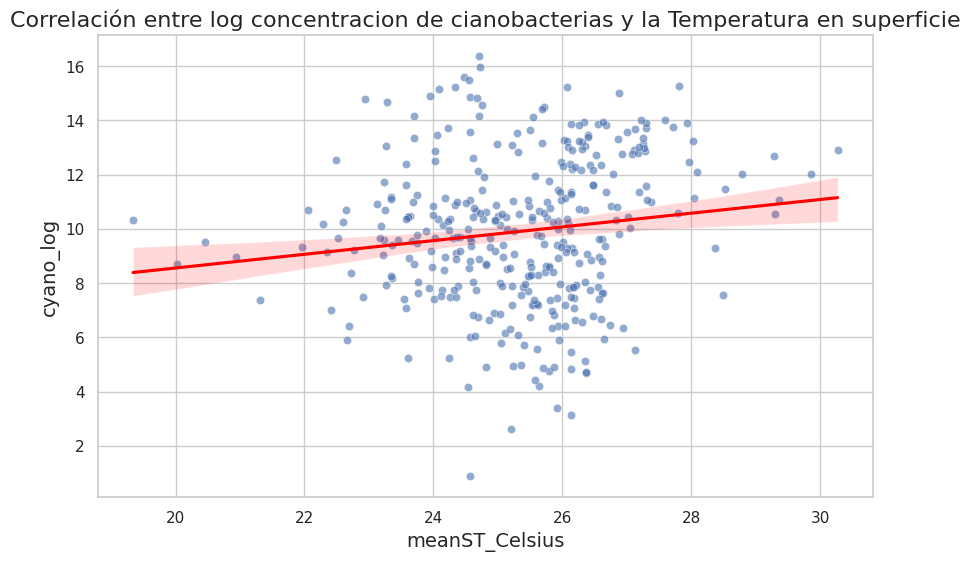

In [95]:
# Relación entre la Temperatura en superficie y cianobacterias

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='cyano_log', x='meanST_Celsius', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, y='cyano_log', x='meanST_Celsius', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre log concentracion de cianobacterias y la Temperatura en superficie', fontsize=16)
plt.ylabel('cyano_log', fontsize=14)
plt.xlabel('meanST_Celsius', fontsize=14)

# Mostrar el gráfico
plt.show()

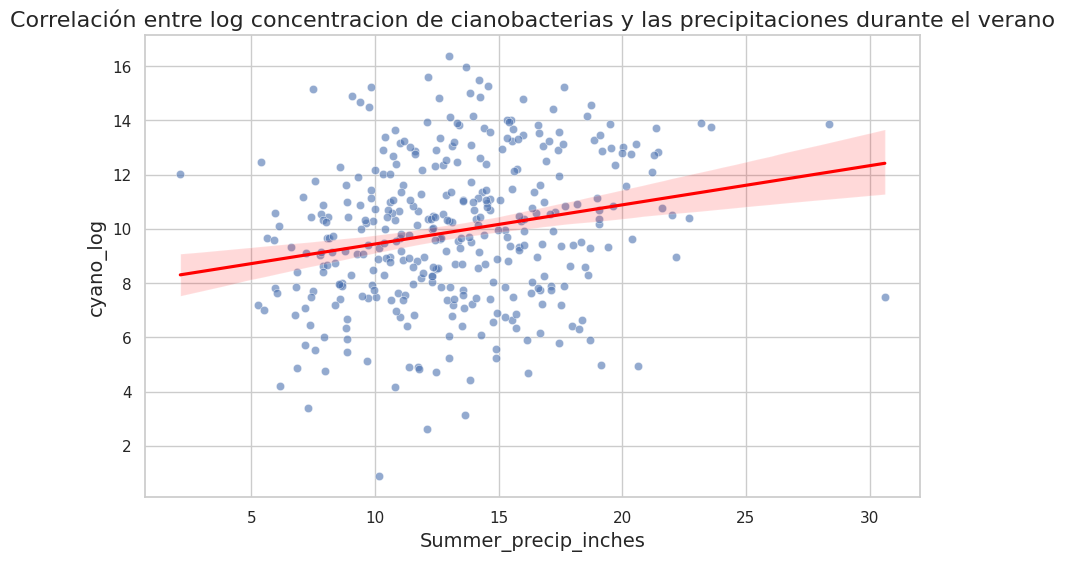

In [96]:
# Relación entre las precipitaciones durante el verano y cianobacterias

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='cyano_log', x='Summer_precip_inches', alpha=0.6)

# Agregar una línea de regresión
sns.regplot(data=df, y='cyano_log', x='Summer_precip_inches', scatter=False, color='red')

# Etiquetas y título
plt.title('Correlación entre log concentracion de cianobacterias y las precipitaciones durante el verano', fontsize=16)
plt.ylabel('cyano_log', fontsize=14)
plt.xlabel('Summer_precip_inches', fontsize=14)

# Mostrar el gráfico
plt.show()

# Variable categorica pasada a booleano

Los tipos de reservorio se clasifican en tres categorías. Para poder usar esta variable en el modelado lo paso a booleanos generando las columnas "Forested_with_stratification" (T o F),
"Agricultural_with_stratification" (T o F) y, si ambos son F, es
"weak or no stratification"

In [97]:
Reservoir_type_boolean = pd.get_dummies(df['Reservoir_type'], prefix='Reservoir_type')
Reservoir_type_boolean

,Reservoir_type_1,Reservoir_type_2,Reservoir_type_3
1,True,False,False
5,True,False,False
6,True,False,False
8,True,False,False
11,True,False,False
...,...,...,...
603,False,True,False
604,False,True,False
605,False,True,False
606,False,True,False


In [98]:
# Cambio el nombre de las columnas y elimino la tercera ya que es redundante
Reservoir_type_boolean.rename(columns={
    'Reservoir_type_1': 'Forested_with_stratification',
    'Reservoir_type_2': 'Agricultural_with_stratification'
}, inplace=True)

Reservoir_type_boolean.drop(columns=['Reservoir_type_3'], inplace = True)

Reservoir_type_boolean

,Forested_with_stratification,Agricultural_with_stratification
1,True,False
5,True,False
6,True,False
8,True,False
11,True,False
...,...,...
603,False,True
604,False,True
605,False,True
606,False,True


In [99]:
# Agrego las nuevas variables al dataframe
df = pd.concat([df, Reservoir_type_boolean], axis=1)

In [123]:
# Creo un nuevo dataframe que contenga solo los parametros que se
# usarán para el modelado
data = df.drop(columns=['Reservoir_type', 'Year', 'Reservoir', 'cyano_log'])

# Análisis de componentes principales


La técnica de PCA (Análisis de Componentes Principales) permite reducir la dimensionalidad de las variables explicatorias, transformándolas en un conjunto de componentes principales que explican la mayor variabilidad presente en los datos. Esto facilita la visualización y el análisis de posibles patrones o correlaciones entre las variables.

In [124]:
# Variables explicatorias
X = data.drop(columns=['Cyanobacteria_Max_cells/ml'])

In [125]:
# Variable dependiente
y = data['Cyanobacteria_Max_cells/ml']

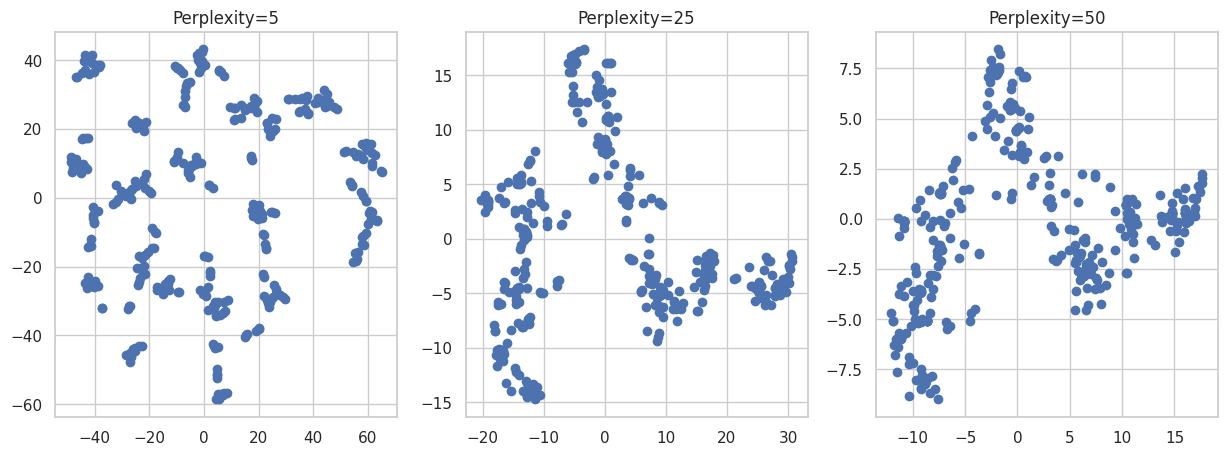

In [126]:
# Pruebo distintos valores de perplexity para ver con cual se genera una mejor representación
def plot_tsne(X, perplexities):
    plt.figure(figsize=(15, 5))
    for i, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=45)
        X_t = tsne.fit_transform(X)
        plt.subplot(1, len(perplexities), i + 1)
        plt.scatter(X_t[:, 0], X_t[:, 1])
        plt.title(f"Perplexity={perplexity}")
    plt.show()

# Perplexity = 5, 25 y 50
plot_tsne(X, perplexities=[5, 25, 50])

Con un valor de perplexity=25 se obtiene una mejor representación.

In [127]:
tsne = TSNE(n_components=2, random_state=45, perplexity=25)
X_t = tsne.fit_transform(X)

In [128]:
# Observo como se relaciona con la concentración de cianobacterias (variable dependiente linealizada con log)
y_log = np.log(y) # Transformo con ln
df2 = pd.DataFrame({'Componente A': X_t[:, 0], 'Componente B': X_t[:, 1], 'y': y_log})
fig = px.scatter(df2, x='Componente A', y='Componente B', color='y',
                 labels={'Componente A': 'Componente A', 'Componente B': 'Componente B', 'y_class': 'Class'})
fig.update_coloraxes(colorbar_title="log [Cianobacterias]")
fig.show()

Las variables explicatorias muestran al menos dos grupos definidos en el espacio de las dos primeras componentes principales. Esta separación podría indicar la existencia de dos condiciones ambientales o factores subyacentes que influyen significativamente en los datos (por ejemplo: podrían estar relacionadas con características ambientales opuestas, como diferencias en los nutrientes, que segmentan las observaciones en dos grupos claros). Sin embargo, no se observa que alguno de estos grupos tengan relación con mayor o menor concentración de cianobacterias.

# Modelado de clasificación

Para generar el modelo de clasificación, se divide la variable de estudio en dos categorías:

- [Cianobacterias] < 20000 cel/ml: Concentraciones seguras.
- [Cianobacterias] > 20000 cel/ml: Concentraciones potencialmente peligrosas para la salud humana, ya que superan el umbral crítico en el que el riesgo aumenta.

In [129]:
y_clas = y > 20000

In [130]:
# Ver si los datos estan balanceados
print("Total de datos:",len(y))
print((y > 20000).sum(), "son mayores a 20000 cel/ml:")

Total de datos: 361
182 son mayores a 20000 cel/ml:


Los datos estan balanceados.

In [131]:
# Separo el conjunto de datos en dos partes: una para entrenar el modelo
# (X_train y y_train) y otra para probar su desempeño (X_test y y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y_clas, random_state=37)

## Crossvalidation
Para entrenar y evaluar el rendimiento de los modelos de clasificación, se usa la **validación cruzada K-Fold**.

Esta técnica permite entrenar y validar el modelo varias veces, utilizando cada fold como conjunto de prueba una vez y como conjunto de entrenamiento las demás, lo que proporciona una evaluación más precisa y confiable del desempeño del modelo.

In [132]:
# Modelo de validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=37)

Se prueban varios algoritmos de clasificación para determinar cuál ofrece el mejor rendimiento en términos de precisión:

- SVC (Support Vector Classifier)
- DecisionTreeClassifier
- AdaBoostClassifier (con DecisionTreeClassifier como base)
- RandomForestClassifier
- ExtraTreesClassifier
- XGBClassifier (XGBoost)
- GradientBoostingClassifier
- MLPClassifier (Multilayer Perceptron, red neuronal)
- KNeighborsClassifier (K-Nearest Neighbors)
- LogisticRegression
- LinearDiscriminantAnalysis (Análisis Discriminante Lineal)

Se aplica validación cruzada K-Fold para evaluar cada modelo. Luego, se calculan las métricas promedio y desviaciones estándar para cada clasificador y se visualizan los resultados mediante un gráfico de barras con errores estándar. Esto permite identificar qué algoritmos tienen mejor desempeño y mayor estabilidad.

<ipython-input-133-89be4f92b1b2>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




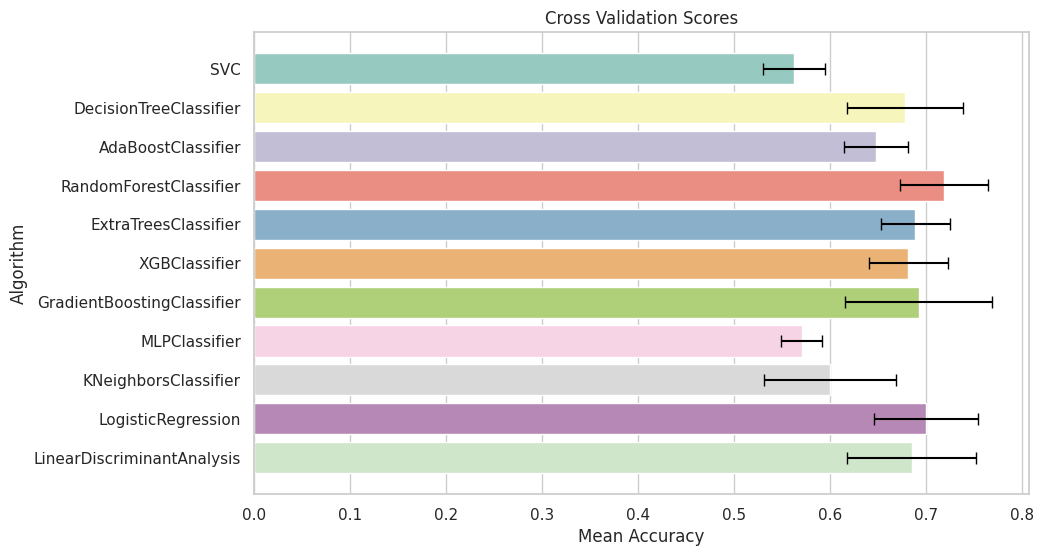

In [133]:
# Modeling step: Test different algorithms
random_state = 37
classifiers = [
    SVC(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1),
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    XGBClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state, max_iter=1000),
    LinearDiscriminantAnalysis()
]

# Cross-validation results
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1))

# Calculate means and std deviations
cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]
algorithms = [clf.__class__.__name__ for clf in classifiers]

# Create DataFrame for visualization
cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValErrors": cv_std, "Algorithm": algorithms})

# Visualización
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear gráfico de barras con errores estándar
g = sns.barplot(
    x="CrossValMeans",
    y="Algorithm",
    data=cv_res,
    palette="Set3",
    orient="h"
)

# Añadir barras de error (std)
for index, (mean, std) in enumerate(zip(cv_res["CrossValMeans"], cv_res["CrossValErrors"])):
    plt.errorbar(
        mean,  # Media (posición de la barra)
        index,  # Índice en el eje Y
        xerr=std,  # Desviación estándar
        fmt='none',  # Sin marcador
        color='black',  # Color de la barra de error
        capsize=4  # Tamaño de las líneas horizontales
    )

# Etiquetas y título
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

El RandomForestClassifier, GradientBoostingClassifier y LogisticRegression muestran una precisión promedio más alta. Para la optimización de hiperparámetros, se continuarán utilizando el RandomForestClassifier, el GradientBoostingClassifier y el XGBClassifier, ya que, al ser algoritmos robustos, tienden a ofrecer un mejor rendimiento y eficiencia.

# Hypertunning

Para mejorar el rendimiento de los modelos de clasificación, se realizará la optimización de hiperparámetros utilizando GridSearchCV. Esta técnica permite probar diferentes combinaciones de valores para los hiperparámetros de cada algoritmo y encontrar la configuración que maximiza el rendimiento del modelo en términos de precisión (accuracy).

## Random Forest

In [134]:
# RFC Parameters tunning
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']
    }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
print("Puntuación del mejor modelo", gsRFC.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Puntuación del mejor modelo 0.7296296296296296


In [135]:
# Hiperparámetros del mejor modelo
gsRFC.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 200}

## Gradient Boosting

In [136]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["log_loss"],
              'n_estimators' : [50, 100, 150, 200],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 10, None],
              'max_features': ['sqrt']
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
print("Puntuación del mejor modelo", gsGBC.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Puntuación del mejor modelo 0.7518518518518519


In [137]:
# Hiperparámetros del mejor modelo
gsGBC.best_params_

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 150}

## XG Boost

In [138]:
# XGB Parameters tunning
XG = XGBClassifier()


## Search grid for optimal parameters
xg_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.3]
    }

gsXG = GridSearchCV(XG,param_grid = xg_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXG.fit(X_train,y_train)

XG_best = gsXG.best_estimator_

# Best score
print("Puntuación del mejor modelo", gsXG.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Puntuación del mejor modelo 0.7370370370370369


In [139]:
# Hiperparámetros del mejor modelo
gsXG.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

En los tres algoritmos (RandomForest, Gradient Boosting y XGBoost), se obtuvieron mejores modelos con puntuaciones similares, todas superiores a 0.7. El modelo con mayor score fue Gradient Boosting (0.752) con los hiperparámetros **{'learning_rate':0.1, 'loss':'log_loss', 'max_depth':5, 'max_features': 'sqrt', 'n_estimators':150}**. Esto sugiere un poder predictivo limitado pero aceptable dentro de lo esperable, ya que estos resultados provienen de un conjunto de datos limitado y de datos biológicos, los cuales suelen presentar una alta variabilidad.

## Modelo de ensamblaje

Otra opción, es combinar múltiples clasificadores para mejorar el rendimiento y la robustez del modelo. VotingClassifier es un modelo de ensamblaje que combina varios algoritmos individuales y toma decisiones basadas en el consenso entre ellos.

In [140]:
# Genero modelo de ensamblaje de los mejores modelos de RandomForest, Gradient Boosting y XGBoost
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('XG', XG_best),
('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [141]:
# Calcular cross-validation accuracy para el Voting Classifier
cv_scores = cross_val_score(votingC, X_train, y_train, cv=5, scoring='accuracy', n_jobs=4)

# Mostrar el accuracy promedio y la desviación estándar
print(f'Accuracy promedio en cross-validation: {cv_scores.mean()}')
print(f'Desviación estándar del accuracy: {cv_scores.std()}')

Accuracy promedio en cross-validation: 0.6962962962962962
Desviación estándar del accuracy: 0.06263531305662134


Al hacer el ensamblaje no cambia la precisión notablemente, por lo que no parece ser una alternativa adecuada.

# Evaluación del rendimiento

 Para verificar qué tan bien funcionan los modelos, se evaluan utilizando el conjunto de datos de prueba que no se utilizaron durante el entrenamiento y la validación cruzada.

In [142]:
# Predicción con el mejor modelo RandomForest
y_pred_rfc = RFC_best.predict(X_test)
print("Accuracy del mejor modelo RandomForest:", accuracy_score(y_test, y_pred_rfc))

# Predicción con Gradient Boosting
y_pred_gbc = gsGBC.best_estimator_.predict(X_test)
print("Accuracy Gradient Boosting:", accuracy_score(y_test, y_pred_gbc))

# Predicción con XGBoost
y_pred_xg = gsXG.best_estimator_.predict(X_test)
print("Accuracy XGBoost:", accuracy_score(y_test, y_pred_xg))

# Predicción con modelos de ensamblaje
VCprediction = votingC.predict(X_test)
print("Accuracy Voting Classifier:", accuracy_score(y_test, VCprediction))

Accuracy del mejor modelo RandomForest: 0.8131868131868132
Accuracy Gradient Boosting: 0.7912087912087912
Accuracy XGBoost: 0.7802197802197802
Accuracy Voting Classifier: 0.7912087912087912


El modelo con mayor precisión al evaluarlo es el Random Forest (accuracy = 0,81)

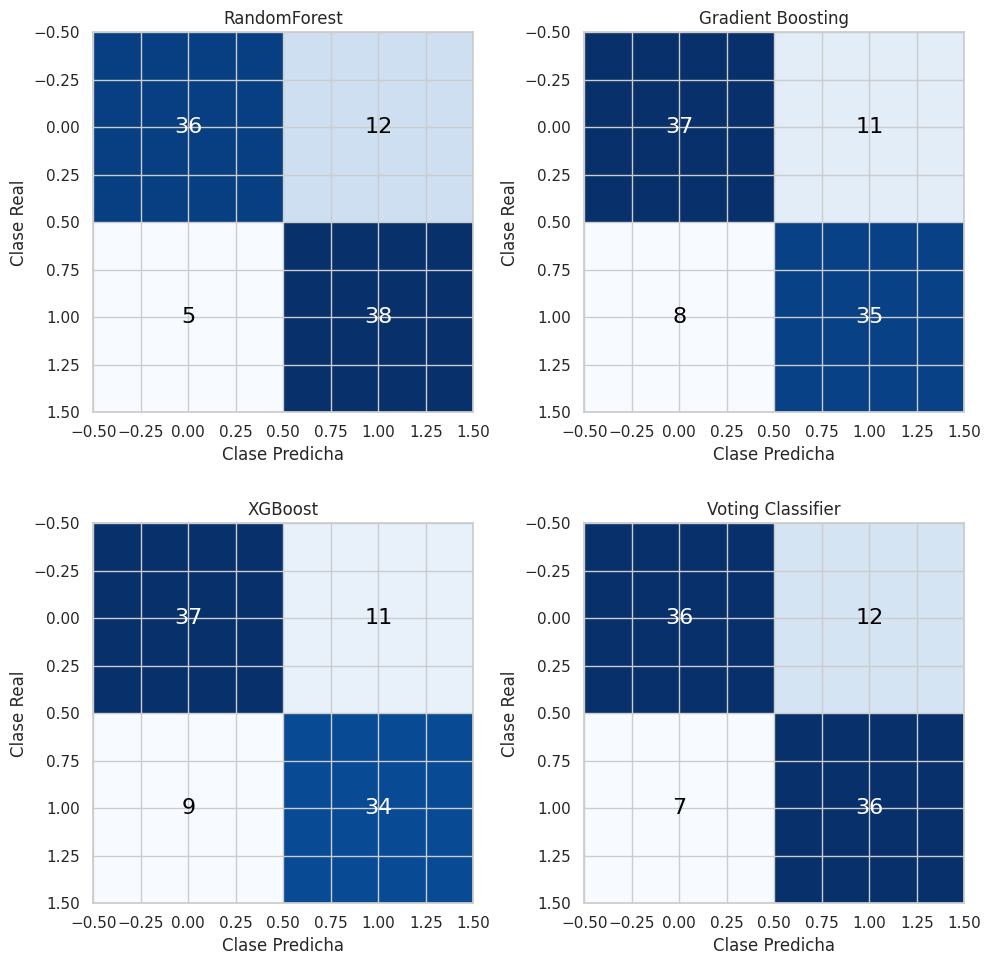

In [144]:
# Matrices de confusion
matriz_rfc = confusion_matrix(y_test, y_pred_rfc)
matriz_gbc = confusion_matrix(y_test, y_pred_gbc)
matriz_xg = confusion_matrix(y_test, y_pred_xg)
matriz_voting = confusion_matrix(y_test, VCprediction)

# Visualizar las matrices de confusión en subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Lista de matrices y títulos
matrices = [matriz_rfc, matriz_gbc, matriz_xg, matriz_voting]
titles = ['RandomForest', 'Gradient Boosting', 'XGBoost', 'Voting Classifier']

for ax, matriz, title in zip(axes.flatten(), matrices, titles):
    ax.imshow(matriz, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel('Clase Predicha')
    ax.set_ylabel('Clase Real')

    # Añadir valores en las celdas con texto ajustable
    for i in range(2):
        for j in range(2):
            val = matriz[i, j]
            color_text = "white" if matriz[i, j] > matriz.max() / 2 else "black"
            ax.text(j, i, str(val), ha="center", va="center", color=color_text, fontsize=16)

plt.tight_layout()
plt.show()


Los modelos tienen buenos resultados en términos de precisión para ambas clases (0 = <20000 cel/ml y 1 = >20000 cel/ml ).
La diagonal principal (0,0 y 1,1) representa las predicciones correctas y son más altas, lo que indica que el modelo tiene un buen desempeño.
No obstante, existen algunos errores. La cantidad de falsos positivos (0,1) y falsos negativos (1,0) muestra el margen de mejora posible.

# Explicabilidad de las variables

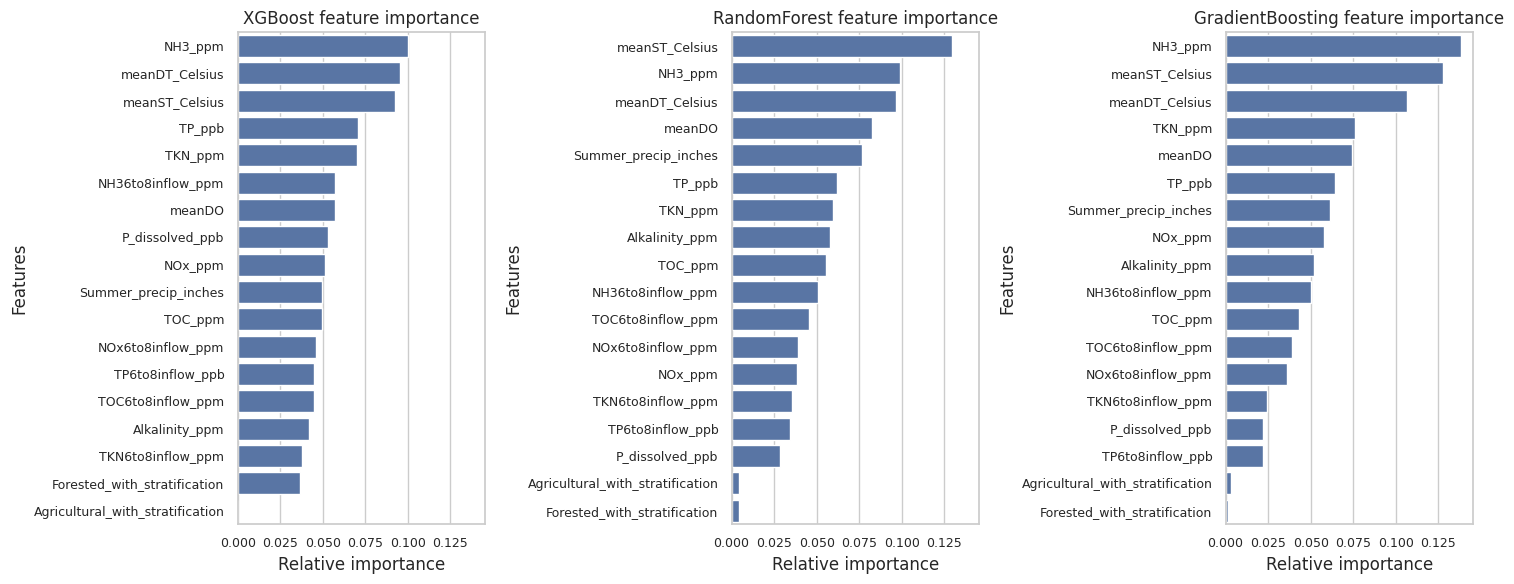

In [145]:
names_classifiers = [
    ("XGBoost", XG_best),
    ("RandomForest", RFC_best),
    ("GradientBoosting", GBC_best)
]

nrows, ncols = 1, len(names_classifiers)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 6), sharex="all")

if ncols == 1:
    axes = [axes]


for idx, (name, classifier) in enumerate(names_classifiers):
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(
        y=X_train.columns[indices][:40],
        x=classifier.feature_importances_[indices][:40],
        orient='h',
        ax=axes[idx]
    )
    g.set_xlabel("Relative importance", fontsize=12)
    g.set_ylabel("Features", fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")

plt.tight_layout()
plt.show()


En todos los modelos, la concentración de amoníaco (NH3) y la temperatura del agua (tanto en superficie como en profundidad) son de las variables que más peso tienen en la determinación de una concentración de cianobacterias peligrosa en el agua. Esta relación coincide con investigaciones científicas previas, las cuales indican que la disponibilidad de nutrientes, como el amoníaco, y las condiciones térmicas del medio acuático, son factores determinantes para el crecimiento y proliferación de las cianobacterias